In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , balanced_accuracy_score , precision_score , recall_score , brier_score_loss, f1_score
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import ParameterGrid
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Data import and expolration

In [5]:
amazon_data_training = pd.read_csv("Datasets/amazon_review_ID.shuf.lrn.csv")
amazon_data_training.describe()

ID          V1          V2          V3          V4          V5  \
count  750.00000  750.000000  750.000000  750.000000  750.000000  750.000000   
mean   374.50000   11.798667    7.474667    6.648000    6.481333    6.122667   
std    216.65064    5.689636    3.611844    3.236365    3.945767    3.332631   
min      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    187.25000    8.000000    5.000000    4.000000    4.000000    4.000000   
50%    374.50000   11.000000    7.000000    6.000000    6.000000    6.000000   
75%    561.75000   15.000000   10.000000    8.000000    9.000000    8.000000   
max    749.00000   30.000000   21.000000   18.000000   25.000000   24.000000   

               V6          V7          V8          V9  ...       V9991  \
count  750.000000  750.000000  750.000000  750.000000  ...  750.000000   
mean     4.580000    4.002667    3.602667    2.898667  ...    0.202667   
std      2.812498    4.037209    2.357726    2.093380  ...    0.538497   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      2.250000    1.000000    2.000000    1.000000  ...    0.000000   
50%      4.000000    3.000000    3.000000    3.000000  ...    0.000000   
75%      6.000000    6.000000    5.000000    4.000000  ...    0.000000   
max     14.000000   21.000000   14.000000   13.000000  ...    4.000000   

            V9992       V9993       V9994       V9995       V9996       V9997  \
count  750.000000  750.000000  750.000000  750.000000  750.000000  750.000000   
mean     0.222667    0.190667    0.201333    0.201333    0.208000    0.210667   
std      0.645219    0.489863    0.616418    0.509717    0.470139    0.504605   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      6.000000    4.000000    8.000000    5.000000    3.000000    4.000000   

            V9998       V9999      V10000  
count  750.000000  750.000000  750.000000  
mean     0.213333    0.205333    0.200000  
std      0.511375    0.465611    0.529503  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      5.000000    3.000000    4.000000  

[8 rows x 10001 columns]

In [6]:
amazon_data_training.isna().any().any()

False

In [7]:
headers=list(amazon_data_training)
headers_vector=headers[1:10001]
s0 = np.sum(amazon_data_training.iloc[:,1:10001],axis=0)
mask0 = np.argsort(s0)[::-1]
type(headers_vector)
headers_sort=np.array(headers_vector)[mask0]
s1 = np.mean(amazon_data_training.iloc[:,1:10001],axis=0)
amazon_data_training[headers_sort].iloc[:,0:10000].describe()

V6567       V6568       V6569       V6570       V6571       V6572  \
count  750.000000  750.000000  750.000000  750.000000  750.000000  750.000000   
mean   250.026667   86.350667   73.136000   67.157333   56.144000   48.729333   
std     65.571814   26.068636   22.481208   20.680913   16.934826   15.798297   
min     49.000000   14.000000   12.000000    9.000000    8.000000    5.000000   
25%    213.000000   69.000000   59.000000   55.000000   45.000000   38.000000   
50%    254.500000   87.000000   74.000000   67.000000   56.000000   48.500000   
75%    295.000000  104.000000   88.000000   81.000000   67.000000   59.000000   
max    410.000000  188.000000  132.000000  133.000000  108.000000   98.000000   

            V6573       V6574       V6575       V6576  ...       V3355  \
count  750.000000  750.000000  750.000000  750.000000  ...  750.000000   
mean    41.428000   33.069333   32.125333   31.926667  ...    0.002667   
std     13.437866   11.327766   11.951963   11.171139  ...    0.051605   
min      5.000000    5.000000    3.000000    3.000000  ...    0.000000   
25%     32.000000   25.000000   24.000000   24.000000  ...    0.000000   
50%     41.000000   32.000000   31.000000   32.000000  ...    0.000000   
75%     51.000000   41.000000   39.000000   39.000000  ...    0.000000   
max     80.000000   67.000000   87.000000   73.000000  ...    1.000000   

            V3501       V3486       V3553       V2619       V6471       V2802  \
count  750.000000  750.000000  750.000000  750.000000  750.000000  750.000000   
mean     0.002667    0.001333    0.001333    0.001333    0.001333    0.001333   
std      0.051605    0.036515    0.036515    0.036515    0.036515    0.036515   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            V2632       V6547  V3281  
count  750.000000  750.000000  750.0  
mean     0.001333    0.001333    0.0  
std      0.036515    0.036515    0.0  
min      0.000000    0.000000    0.0  
25%      0.000000    0.000000    0.0  
50%      0.000000    0.000000    0.0  
75%      0.000000    0.000000    0.0  
max      1.000000    1.000000    0.0  

[8 rows x 10000 columns]

In [9]:
print(s0.describe().to_latex())
print(amazon_data_training[headers_sort].iloc[:,0].sort_values())

\begin{tabular}{lr}
\toprule
{} &              0 \\
\midrule
count &   10000.000000 \\
mean  &     308.859700 \\
std   &    2419.468303 \\
min   &       0.000000 \\
25\%   &       9.000000 \\
50\%   &      21.000000 \\
75\%   &     220.000000 \\
max   &  187520.000000 \\
\bottomrule
\end{tabular}

597     49
81      53
441     54
156     58
258     59
      ... 
618    388
407    389
705    395
241    408
406    410
Name: V6567, Length: 750, dtype: int64


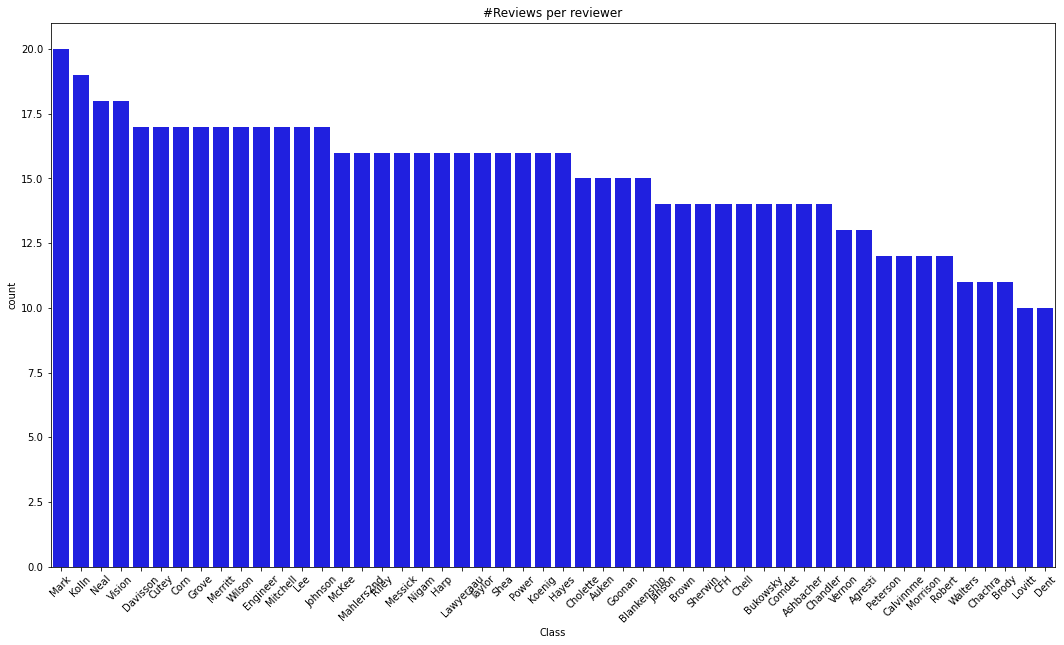

In [10]:
countplt, ax = plt.subplots(figsize = (18,10))

ax = sns.countplot(data=amazon_data_training, x='Class', color="blue", order = amazon_data_training['Class'].value_counts().index)
ax.set_title("#Reviews per reviewer")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.savefig("Instances per class.pdf")

In [2]:
# Import all algorithms used and compared
def create_perceptron(train_data, target, alpha, eta, penalty, max_iter, random_state=42):
    clf = Perceptron(random_state=random_state, eta0=eta, alpha=alpha, penalty=penalty, max_iter=max_iter) 
    clf.fit(train_data, target)
    return clf

def create_rnd_forrest(train_data, target, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42):
    clf = RandomForestClassifier(max_depth=max_depth, random_state=42, ccp_alpha=ccp_alpha, max_leaf_nodes=max_leaf, n_estimators=n_estimators)
    clf.fit(train_data, target)
    return clf

def create_nb(train_data, target, alpha):
    clf = MultinomialNB()
    clf.fit(train_data, target)
    return clf


In [3]:
# Import data and split into validation and training data
dataset_unsorted = pd.read_csv("Datasets/amazon_review_ID.shuf.lrn.csv")
headers = list(dataset_unsorted)
headers_vector = headers[1:10001] #we do not include column 0 which is the unique id.
s0 = np.sum(dataset_unsorted.iloc[:, 1:10001], axis=0) #Total count of each word/vector
mask0 = np.argsort(s0)[::-1] #sort data from most used words to fewest words
headers_sort = np.array(headers_vector)[mask0]
dataset_ = pd.concat([dataset_unsorted[headers_sort], dataset_unsorted["Class"]], axis=1, join='inner')

# Data set used for hold out. Result not good.
dataset, validation_set = train_test_split(dataset_ , test_size=0.1, random_state=42, shuffle=True)
#dataset = train_set
y=dataset["Class"]

In [4]:
#Create binary dataset
data= np.array(dataset.iloc[:,:10000])
df_1 = pd.DataFrame(data, index=range(data.shape[0]), columns=range(data.shape[1]))

eps = 1
b_1 = np.zeros((df_1.shape[0], df_1.shape[1]))
for i in range(df_1.shape[0]):
    for j in range(df_1.shape[1]):
        if df_1.loc[i,j] < eps:
            b_1[i,j] = 0
        else:
            b_1[i,j] = 1
dataset_bin = pd.DataFrame(b_1, columns=df_1.columns, index=dataset.index)


data_2= np.array(validation_set.iloc[:,:10000])
df_2 = pd.DataFrame(data_2, index=range(data_2.shape[0]), columns=range(data_2.shape[1]))
eps_2 = 1
b_2 = np.zeros((df_2.shape[0], df_2.shape[1]))
for i in range(df_2.shape[0]):
    for j in range(df_2.shape[1]):
        if df_2.loc[i,j] < eps_2:
            b_2[i,j] = 0
        else:
            b_2[i,j] = 1
validation_bin = pd.DataFrame(b_2, columns=df_2.columns, index=validation_set.index)


data_3= np.array(dataset_.iloc[:,:10000])
df_3 = pd.DataFrame(data_3, index=range(data_3.shape[0]), columns=range(data_3.shape[1]))
eps_3 = 1
b_3 = np.zeros((df_3.shape[0], df_3.shape[1]))
for i in range(df_3.shape[0]):
    for j in range(df_3.shape[1]):
        if df_3.loc[i,j] < eps_3:
            b_3[i,j] = 0
        else:
            b_3[i,j] = 1
dataset__bin = pd.DataFrame(b_3, columns=df_3.columns, index=dataset_.index)

In [5]:
#Datasets for scenarios
X_names=["10000", "8000", "6000", "50:10000", "50:8000", "50:6000", "100:10000", "100:8000", "100:6000"]
X_range = [dataset.iloc[:, :10000], dataset.iloc[:, :8000], dataset.iloc[:, :6000], dataset.iloc[:, 50:10000], dataset.iloc[:, 50:8000], dataset.iloc[:, 50:6000], dataset.iloc[:,100:10000], dataset.iloc[:, 100:8000], dataset.iloc[:, 100:6000]]
X_range_ln= [np.log(dataset.iloc[:, :10000]+1), np.log(dataset.iloc[:, :8000]+1), np.log(dataset.iloc[:, :6000]+1), np.log(dataset.iloc[:, 50:10000]+1), np.log(dataset.iloc[:, 50:8000]+1), np.log(dataset.iloc[:, 50:6000]+1), np.log(dataset.iloc[:, 100:10000]+1), np.log(dataset.iloc[:, 100:8000]+1), np.log(dataset.iloc[:, 100:6000]+1)]
X_range_bin=[dataset_bin.iloc[:, :10000], dataset_bin.iloc[:, :8000], dataset_bin.iloc[:, :6000], dataset_bin.iloc[:, 50:10000], dataset_bin.iloc[:, 50:8000], dataset_bin.iloc[:, 50:6000], dataset_bin.iloc[:,100:10000], dataset_bin.iloc[:, 100:8000], dataset_bin.iloc[:, 100:6000]]


# Perceptron

In [6]:
# Perceptron parameters

#Base parameter setting
random_state=42
alpha = 0.0005
eta = 1
penalty='none'
max_iter=100


In [7]:
#Perceptron with hold out
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
accuracy_X_bin ,recall_X_bin,  precision_X_bin,  accuracy_X_bin_train, recall_X_bin_train, precision_X_bin_train =  [], [], [],[], [], []
f1_X, f1_X_train, f1_X_ln, f1_X_ln_train, f1_X_bin, f1_X_bin_train= [],[],[],[],[],[]

for X in X_range:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
    accuracy_X.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X.append(f1_score(y_test, model.predict(X_test), average="macro") * 100)
    f1_X.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    accuracy_X_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    f1_X_train.append(f1_score(y_train, model.predict(X_train), average="macro") * 100)
    
for X in X_range_ln:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
    accuracy_X_ln.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X_ln.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X_ln.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    f1_X_ln.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
    accuracy_X_ln_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_ln_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_ln_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    f1_X_ln_train.append(f1_score(y_train, model.predict(X_train), average="macro") * 100)
    
for X in X_range_bin:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
    accuracy_X_bin.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X_bin.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X_bin.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    f1_X_bin.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
    accuracy_X_bin_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_bin_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_bin_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    f1_X_bin_train.append(f1_score(y_train, model.predict(X_train), average="macro") * 100)

Accuracy_matrix = {'Scenario': X_names, "Basic test": accuracy_X, "Basic train": accuracy_X_train, "LN test": accuracy_X_ln, "LN train": accuracy_X_ln_train, 'Bin test':accuracy_X_bin, "Bin train": accuracy_X_bin_train }
Recall_matrix = {'Scenario': X_names, "Basic test": recall_X, "Basic train": recall_X_train, "LN test": recall_X_ln, "LN train": recall_X_ln_train, "Bin test": recall_X_bin, "Bin train": recall_X_bin_train}
Precision_matrix = {'Scenario': X_names, "Basic test": precision_X, "Basic train": precision_X_train, "LN test": precision_X_ln, "LN train": precision_X_ln_train, "Bin test": precision_X_bin, "Bin train": precision_X_bin_train }
f1_matrix={'Scenario': X_names, "Basic test": f1_X, "Basic train": f1_X_train, "LN test": f1_X_ln, "LN train": f1_X_ln_train, "Bin test": f1_X_bin, "Bin train": f1_X_bin_train }
pd.DataFrame(Accuracy_matrix).to_csv("Perceptron_HO_accuracy.csv")
pd.DataFrame(Precision_matrix).to_csv("Perceptron_HO_precision.csv")
pd.DataFrame(Recall_matrix).to_csv("Perceptron_HO_recall.csv")
pd.DataFrame(Recall_matrix).to_csv("Perceptron_HO_f1.csv")

print(pd.DataFrame(Accuracy_matrix).to_latex())
print(pd.DataFrame(Recall_matrix).to_latex())
print(pd.DataFrame(Precision_matrix).to_latex())
print(pd.DataFrame(f1_matrix).to_latex())

\begin{tabular}{llrrrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &  LN train &   Bin test &  Bin train \\
\midrule
0 &      10000 &   37.777778 &    91.666667 &  40.000000 &     100.0 &  31.111111 &      100.0 \\
1 &       8000 &   39.259259 &    91.296296 &  41.481481 &     100.0 &  29.629630 &      100.0 \\
2 &       6000 &   40.000000 &    88.148148 &  47.407407 &     100.0 &  28.888889 &      100.0 \\
3 &   50:10000 &   40.740741 &   100.000000 &  34.074074 &     100.0 &  26.666667 &      100.0 \\
4 &    50:8000 &   40.740741 &   100.000000 &  36.296296 &     100.0 &  28.888889 &      100.0 \\
5 &    50:6000 &   40.000000 &   100.000000 &  41.481481 &     100.0 &  22.962963 &      100.0 \\
6 &  100:10000 &   40.000000 &   100.000000 &  43.703704 &     100.0 &  29.629630 &      100.0 \\
7 &   100:8000 &   40.000000 &   100.000000 &  42.962963 &     100.0 &  28.888889 &      100.0 \\
8 &   100:6000 &   37.037037 &   100.000000 &  41.481481 &     100.0 &  3

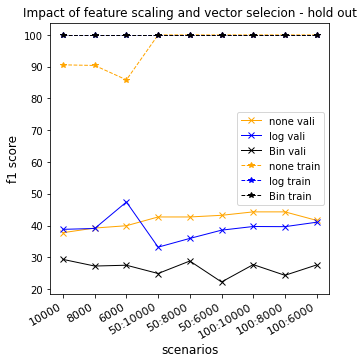

In [8]:
#Graph perceptron hold out
vals      = np.arange(9)
plt.figure(figsize=(5,5))
plt.plot(vals, f1_X,color="orange",marker="x", linewidth=1,label="none vali")
plt.plot(vals, f1_X_ln ,color="blue",marker="x", linewidth=1,label="log vali")
plt.plot(vals, f1_X_bin ,color="black",marker="x", linewidth=1,label="Bin vali")
plt.plot(vals, f1_X_train,"--",color="orange",marker="*", linewidth=1,label="none train")
plt.plot(vals, f1_X_ln_train,"--",color="blue",marker="*", linewidth=1,label="log train")
plt.plot(vals, f1_X_bin_train,"--",color="black",marker="*", linewidth=1,label="Bin train")
plt.legend(loc="best")
plt.title("Impact of feature scaling and vector selecion - hold out",fontsize=12)
plt.ylabel("f1 score",fontsize=12)
plt.xlabel("scenarios",fontsize=12)
labels =X_names
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
plt.savefig("./perc_scaling_vect_selection_HO.pdf")

In [9]:
#Perceptron with cross validation
import warnings
warnings.filterwarnings('ignore')

accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
accuracy_X_bin ,recall_X_bin,  precision_X_bin,  accuracy_X_bin_train, recall_X_bin_train, precision_X_bin_train =  [], [], [],[], [], []
f1_X, f1_X_train, f1_X_ln, f1_X_ln_train, f1_X_bin, f1_X_bin_train= [],[],[],[],[],[]

for X in X_range:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    f1_model, f1_model_train=[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    f1_X.append(np.mean(f1_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    f1_X_train.append(np.mean(f1_model_train))

for X in X_range_ln:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    f1_model, f1_model_train=[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model =create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X_ln.append(np.mean(accuracy_model))
    precision_X_ln.append(np.mean(precision_model))
    recall_X_ln.append(np.mean(recall_model))
    f1_X_ln.append(np.mean(f1_model))
    accuracy_X_ln_train.append(np.mean(accuracy_model_train))
    precision_X_ln_train.append(np.mean(precision_model_train))
    recall_X_ln_train.append(np.mean(recall_model_train))
    f1_X_ln_train.append(np.mean(f1_model_train))
    
for X in X_range_bin:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    f1_model, f1_model_train=[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model =create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X_bin.append(np.mean(accuracy_model))
    precision_X_bin.append(np.mean(precision_model))
    recall_X_bin.append(np.mean(recall_model))
    f1_X_bin.append(np.mean(f1_model))
    accuracy_X_bin_train.append(np.mean(accuracy_model_train))
    precision_X_bin_train.append(np.mean(precision_model_train))
    recall_X_bin_train.append(np.mean(recall_model_train))
    f1_X_bin_train.append(np.mean(f1_model_train))

Accuracy_matrix = {'Scenario': X_names, "Basic test": accuracy_X, "Basic train": accuracy_X_train, "LN test": accuracy_X_ln, "LN train": accuracy_X_ln_train, 'Bin test':accuracy_X_bin, "Bin train": accuracy_X_bin_train }
Recall_matrix = {'Scenario': X_names, "Basic test": recall_X, "Basic train": recall_X_train, "LN test": recall_X_ln, "LN train": recall_X_ln_train, "Bin test": recall_X_bin, "Bin train": recall_X_bin_train}
Precision_matrix = {'Scenario': X_names, "Basic test": precision_X, "Basic train": precision_X_train, "LN test": precision_X_ln, "LN train": precision_X_ln_train, "Bin test": precision_X_bin, "Bin train": precision_X_bin_train }
f1_matrix = {'Scenario': X_names, "Basic test": f1_X, "Basic train": f1_X_train, "LN test": f1_X_ln, "LN train": f1_X_ln_train, "Bin test": f1_X_bin, "Bin train": f1_X_bin_train }
pd.DataFrame(Accuracy_matrix).to_csv("Perceptron_CV_accuracy.csv")
pd.DataFrame(Precision_matrix).to_csv("Perceptron_CV_precision.csv")
pd.DataFrame(Recall_matrix).to_csv("Perceptron_CV_recall.csv")
pd.DataFrame(f1_matrix).to_csv("Perceptron_CV_recall.csv")

print(pd.DataFrame(Accuracy_matrix).to_latex())
print(pd.DataFrame(Recall_matrix).to_latex())
print(pd.DataFrame(Precision_matrix).to_latex())
print(pd.DataFrame(f1_matrix).to_latex())


\begin{tabular}{llrrrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &  LN train &   Bin test &  Bin train \\
\midrule
0 &      10000 &   37.605356 &    90.156643 &  46.066725 &     100.0 &  34.942932 &      100.0 \\
1 &       8000 &   36.872256 &    89.577950 &  46.501317 &     100.0 &  35.533363 &      100.0 \\
2 &       6000 &   37.594381 &    88.494890 &  47.245391 &     100.0 &  35.691396 &      100.0 \\
3 &   50:10000 &   49.014486 &   100.000000 &  45.919666 &     100.0 &  35.546532 &      100.0 \\
4 &    50:8000 &   47.528534 &   100.000000 &  46.521071 &     100.0 &  37.778753 &      100.0 \\
5 &    50:6000 &   46.494732 &   100.000000 &  47.107112 &     100.0 &  37.036874 &      100.0 \\
6 &  100:10000 &   46.622037 &   100.000000 &  44.141791 &     100.0 &  37.157594 &      100.0 \\
7 &   100:8000 &   46.924934 &   100.000000 &  44.582968 &     100.0 &  38.202371 &      100.0 \\
8 &   100:6000 &   46.933714 &   100.000000 &  44.885865 &     100.0 &  3

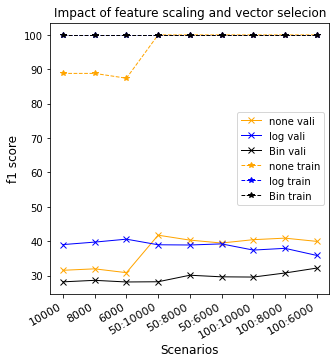

In [11]:
#Graph perceptron cross validation
vals      = np.arange(9)
plt.figure(figsize=(5,5))
plt.plot(vals, f1_X,color="orange",marker="x", linewidth=1,label="none vali")
plt.plot(vals, f1_X_ln ,color="blue",marker="x", linewidth=1,label="log vali")
plt.plot(vals, f1_X_bin ,color="black",marker="x", linewidth=1,label="Bin vali")
plt.plot(vals, f1_X_train,"--",color="orange",marker="*", linewidth=1,label="none train")
plt.plot(vals, f1_X_ln_train,"--",color="blue",marker="*", linewidth=1,label="log train")
plt.plot(vals, f1_X_bin_train,"--",color="black",marker="*", linewidth=1,label="Bin train")
plt.legend(loc="best")
plt.title("Impact of feature scaling and vector selecion",fontsize=12)
plt.ylabel("f1 score",fontsize=12)
plt.xlabel("Scenarios",fontsize=12)
labels =X_names
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
plt.savefig("./perc_scaling_vect_selection.pdf")



In [71]:
#Perceptron fine tuning max iteraions for the best scenario
import warnings
warnings.filterwarnings('ignore')

#Max iterations
#Base parameter setting
alpha = 0.0005
eta = 1
penalty='none'
random_state=42

accuracy_X_bin ,recall_X_bin,  precision_X_bin,  accuracy_X_bin_train, recall_X_bin_train, precision_X_bin_train =  [], [], [],[], [], []
f1_X, f1_X_train, f1_X_ln, f1_X_ln_train, f1_X_bin, f1_X_bin_train= [],[],[],[],[],[]

import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []

max_iter_range=[2, 3, 4, 5, 10, 50, 100]
X = dataset.iloc[:, 50:10000]
kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for max_iter in max_iter_range:
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    f1_model, f1_model_train=[], []
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    f1_X.append(np.mean(f1_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    f1_X_train.append(np.mean(f1_model_train))
    
Accuracy_matrix_maxiter = {'Max iter': max_iter_range, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
Recall_matrix_maxiter = {'Max iter': max_iter_range, "Basic test": recall_X, "Basic train": recall_X_train}
Precision_matrix_maxiter = {'Max iter': max_iter_range, "Basic test": precision_X, "Basic train": precision_X_train}
f1_matrix_maxiter = {'Max iter': max_iter_range, "Basic test": f1_X, "Basic train": f1_X_train}
pd.DataFrame(Accuracy_matrix_maxiter).to_csv("Perceptron_CV_maxiter_accuracy.csv")
pd.DataFrame(Precision_matrix_maxiter).to_csv("Perceptron_CV_maxiter_precision.csv")
pd.DataFrame(Recall_matrix_maxiter).to_csv("Perceptron_CV_maxiter_recall.csv")
pd.DataFrame(f1_matrix_maxiter).to_csv("Perceptron_CV_maxiter_f1.csv")
                               
print(pd.DataFrame(Accuracy_matrix_maxiter).to_latex())
print(pd.DataFrame(Recall_matrix_maxiter).to_latex())
print(pd.DataFrame(Precision_matrix_maxiter).to_latex())
print(pd.DataFrame(f1_matrix_maxiter).to_latex())



\begin{tabular}{lrrr}
\toprule
{} &  Max iter &  Basic test &  Basic train \\
\midrule
0 &         2 &   21.611062 &    69.747274 \\
1 &         3 &   36.325724 &    91.338171 \\
2 &         4 &   40.575066 &    97.135719 \\
3 &         5 &   46.345478 &    99.456776 \\
4 &        10 &   49.014486 &   100.000000 \\
5 &        50 &   49.014486 &   100.000000 \\
6 &       100 &   49.014486 &   100.000000 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Max iter &  Basic test &  Basic train \\
\midrule
0 &         2 &   20.935599 &    69.876612 \\
1 &         3 &   35.887290 &    91.346126 \\
2 &         4 &   37.852190 &    97.141164 \\
3 &         5 &   43.491244 &    99.421462 \\
4 &        10 &   45.507052 &   100.000000 \\
5 &        50 &   45.507052 &   100.000000 \\
6 &       100 &   45.507052 &   100.000000 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Max iter &  Basic test &  Basic train \\
\midrule
0 &         2 &   19.114743 &    87.87621

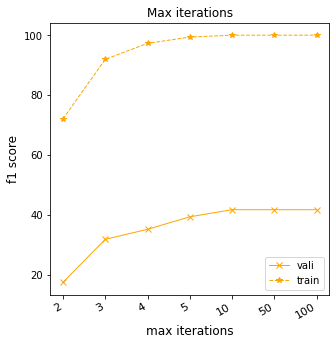

In [73]:
vals      = np.arange(7)
plt.figure(figsize=(5,5))
plt.plot(vals, f1_X,color="orange",marker="x", linewidth=1,label="vali")
plt.plot(vals, f1_X_train,"--",color="orange",marker="*", linewidth=1,label="train")
plt.legend(loc="best")
plt.title("Max iterations",fontsize=12)
plt.ylabel("f1 score",fontsize=12)
plt.xlabel("max iterations",fontsize=12)
labels =max_iter_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
plt.savefig("./Per_max_iterations_2.pdf")

In [77]:
#Learning rate
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
f1_X, f1_X_train= [],[]

max_iter=10
eta_range=[1e-4, 1e-3, 0.01, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1]
X = dataset.iloc[:, 50:10000]

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for eta in eta_range:
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    f1_model, f1_model_train=[], []
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    f1_X.append(np.mean(f1_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    f1_X_train.append(np.mean(f1_model_train))
    
Accuracy_matrix_Eta = {'Eta range': eta_range, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
Recall_matrix_Eta = {'Eta range': eta_range, "Basic test": recall_X, "Basic train": recall_X_train}
Precision_matrix_Eta = {'Eta range': eta_range, "Basic test": precision_X, "Basic train": precision_X_train}
f1_matrix_Eta = {'Eta range': eta_range, "Basic test": f1_X, "Basic train": f1_X_train}
pd.DataFrame(Accuracy_matrix_Eta).to_csv("Perceptron_CV_Eta_accuracy.csv")
pd.DataFrame(Precision_matrix_Eta).to_csv("Perceptron_CV_Eta_precision.csv")
pd.DataFrame(Recall_matrix_Eta).to_csv("Perceptron_CV_Eta_recall.csv")
pd.DataFrame(f1_matrix_Eta).to_csv("Perceptron_CV_Eta_f1.csv")

print(pd.DataFrame(Accuracy_matrix_Eta).to_latex())
print(pd.DataFrame(Recall_matrix_Eta).to_latex())
print(pd.DataFrame(Precision_matrix_Eta).to_latex())
print(pd.DataFrame(f1_matrix_Eta).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Eta range &  Basic test &  Basic train \\
\midrule
0 &     0.0001 &   43.663301 &    96.364969 \\
1 &     0.0010 &   46.648376 &    99.835364 \\
2 &     0.0100 &   46.496927 &    99.851811 \\
3 &     0.1000 &   46.349868 &    99.851811 \\
4 &     0.2000 &   46.349868 &    99.851811 \\
5 &     0.3000 &   46.349868 &    99.851811 \\
6 &     0.4000 &   46.349868 &    99.851811 \\
7 &     0.6000 &   46.349868 &    99.851811 \\
8 &     0.8000 &   46.349868 &    99.851811 \\
9 &     1.0000 &   46.496927 &    99.851811 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Eta range &  Basic test &  Basic train \\
\midrule
0 &     0.0001 &   41.183498 &    96.210462 \\
1 &     0.0010 &   44.292514 &    99.801265 \\
2 &     0.0100 &   44.118096 &    99.819447 \\
3 &     0.1000 &   44.059956 &    99.819447 \\
4 &     0.2000 &   44.059956 &    99.819447 \\
5 &     0.3000 &   44.059956 &    99.819447 \\
6 &     0.4000 &   44.059956 &    99.819447 \

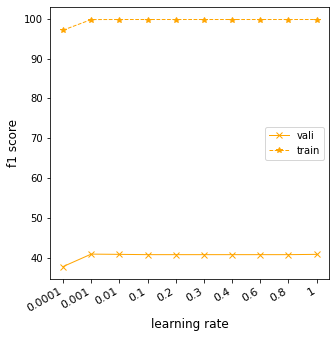

In [78]:
vals      = np.arange(10)
plt.figure(figsize=(5,5))
plt.plot(vals, f1_X,color="orange",marker="x", linewidth=1,label="vali")
plt.plot(vals, f1_X_train,"--",color="orange",marker="*", linewidth=1,label="train")
plt.legend(loc="best")
plt.title("",fontsize=12)
plt.ylabel("f1 score",fontsize=12)
plt.xlabel("learning rate",fontsize=12)
labels =eta_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
plt.savefig("./Per_learning_rate2.pdf")

In [79]:
#alpha
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
f1_X, f1_X_train= [],[]
max_iter=10
eta=0.001
penalty='l1'
alpha_range=[1e-5, 1e-4, 0.0002, 0.0004, 0.0006, 0.0008, 1e-3]
X=dataset.iloc[:, 50:10000]

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for alpha in alpha_range:
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    f1_model, f1_model_train=[], []
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    f1_X.append(np.mean(f1_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    f1_X_train.append(np.mean(f1_model_train))
    
Accuracy_matrix_alpha = {'Alpha': alpha_range, "Basic vali": accuracy_X, "Basic train": accuracy_X_train}
Recall_matrix_alpha = {'Alpha': alpha_range, "Basic vali": recall_X, "Basic train": recall_X_train}
Precision_matrix_alpha = {'Alpha': alpha_range, "Basic vali": precision_X, "Basic train": precision_X_train}
f1_matrix_alpha = {'Alpha': alpha_range, "Basic vali": f1_X, "Basic train": f1_X_train}
pd.DataFrame(Accuracy_matrix_alpha).to_csv("Perceptron_CV_alpha_accuracy.csv")
pd.DataFrame(Precision_matrix_alpha).to_csv("Perceptron_CV_alpha_precision.csv")
pd.DataFrame(Recall_matrix_alpha).to_csv("Perceptron_CV_alpha_recall.csv")
pd.DataFrame(f1_matrix_alpha).to_csv("Perceptron_CV_alpha_f1.csv")

print(pd.DataFrame(Accuracy_matrix_alpha).to_latex())
print(pd.DataFrame(Recall_matrix_alpha).to_latex())
print(pd.DataFrame(Precision_matrix_alpha).to_latex())
print(pd.DataFrame(f1_matrix_alpha).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &    Alpha &  Basic vali &  Basic train \\
\midrule
0 &  0.00001 &   49.310799 &   100.000000 \\
1 &  0.00010 &   44.154960 &    96.458017 \\
2 &  0.00020 &   46.648376 &    99.835364 \\
3 &  0.00040 &   43.206760 &    98.650665 \\
4 &  0.00060 &   46.782265 &    99.506471 \\
5 &  0.00080 &   45.177788 &    99.259408 \\
6 &  0.00100 &   43.698420 &    97.958332 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &    Alpha &  Basic vali &  Basic train \\
\midrule
0 &  0.00001 &   45.672473 &   100.000000 \\
1 &  0.00010 &   41.636927 &    96.425437 \\
2 &  0.00020 &   44.292514 &    99.801265 \\
3 &  0.00040 &   40.611092 &    98.565201 \\
4 &  0.00060 &   42.576225 &    99.455958 \\
5 &  0.00080 &   41.055735 &    99.243778 \\
6 &  0.00100 &   40.478569 &    97.891826 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &    Alpha &  Basic vali &  Basic train \\
\midrule
0 &  0.00001 &   45.155842 &   100.000000 \\
1 &  0.00010 

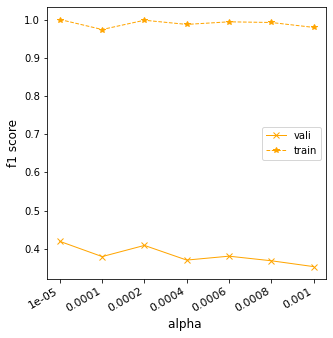

In [80]:
vals      = np.arange(7)
plt.figure(figsize=(5,5))
plt.plot(vals, f1_X,color="orange",marker="x", linewidth=1,label="vali")
plt.plot(vals, f1_X_train,"--",color="orange",marker="*", linewidth=1,label="train")
plt.legend(loc="best")
plt.title("",fontsize=12)
plt.ylabel("f1 score",fontsize=12)
plt.xlabel("alpha ",fontsize=12)
labels =alpha_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
plt.savefig("./Per_alpha2.pdf")

In [81]:
X = dataset.iloc[:, 50:8000]
model = create_perceptron(X, dataset["Class"], 0.00001, 0.001, 'l1', 10, random_state=42)
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_set.iloc[:, 50:8000]), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"],model.predict(validation_set.iloc[:, 50:8000]), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(validation_set.iloc[:,50:8000]), average="macro") * 100)
f1_model=(f1_score(validation_set["Class"], model.predict(validation_set.iloc[:, 50:8000]), average="macro") * 100)

print(accuracy_model, recall_model, precision_model, f1_model)

53.333333333333336 55.53030303030303 52.08333333333333 49.77272727272728


In [45]:
accuracy_model=[]
X = np.log(dataset.iloc[:, 50:8000]+1)
model = create_perceptron(X, dataset["Class"], 0.0002, 1, 'l1', 10, random_state=42)
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:, 50:8000]+1)), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"],model.predict(np.log(validation_set.iloc[:, 50:8000]+1)), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:,50:8000]+1)), average="macro") * 100)
f1_model=(f1_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:,50:8000]+1)), average="macro") * 100)
print(accuracy_model, recall_model, precision_model, f1_model)

50.66666666666667 49.222222222222214 48.85714285714286 44.31040564373899


In [20]:
print(confusion_matrix(validation_set["Class"], model.predict(np.log(validation_set.iloc[:, 50:8000]+1)), labels=dataset_['Class'].unique()))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


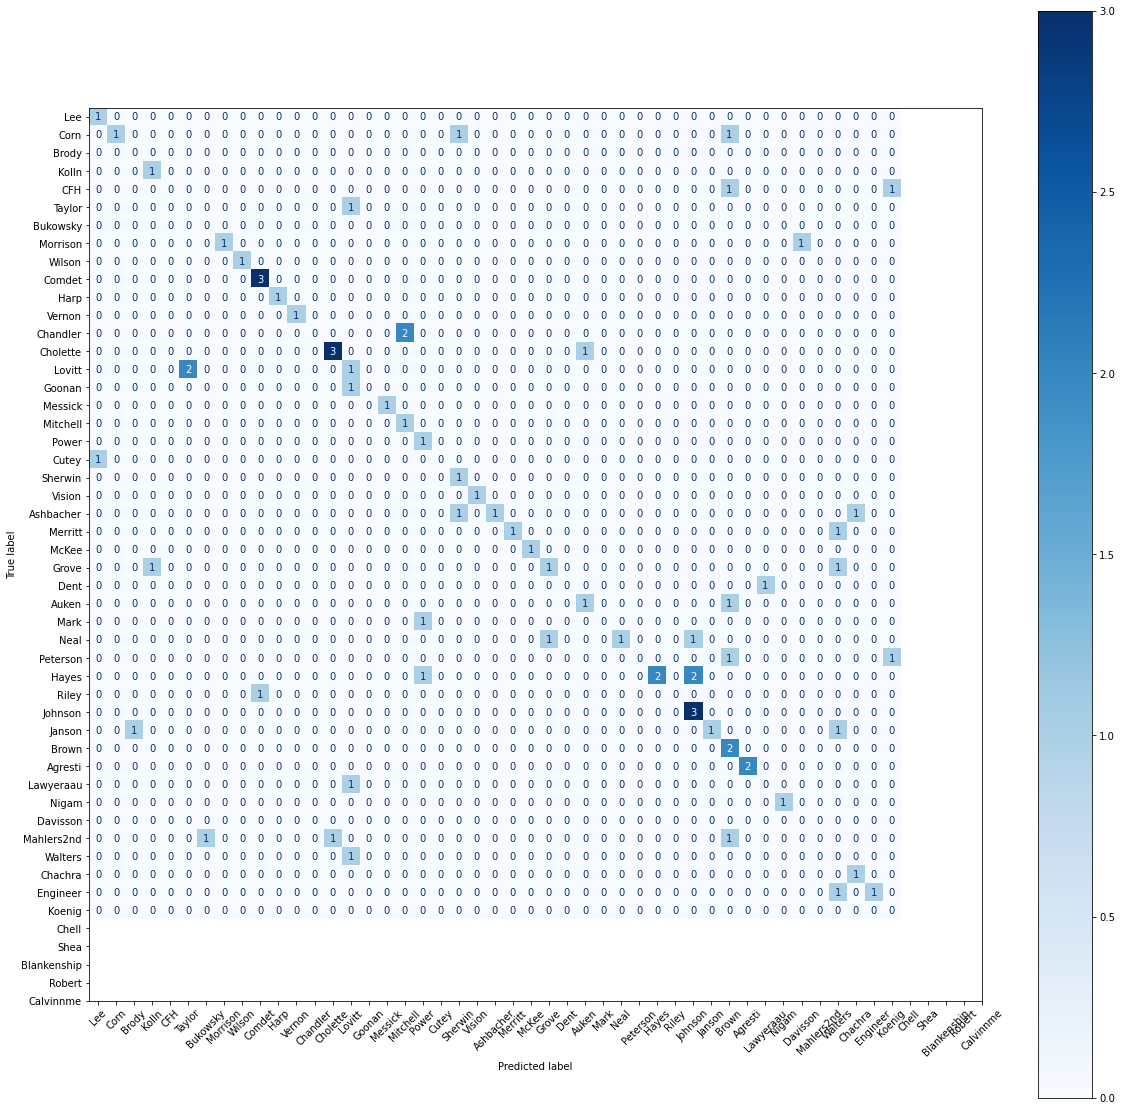

In [21]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(model, np.log(validation_set.iloc[:, 50:8000]+1),validation_set["Class"], ax=ax, cmap='Blues')
tick_marks = np.arange(len(dataset_['Class'].unique()))
plt.xticks(tick_marks, dataset_['Class'].unique(), rotation=45)
plt.yticks(tick_marks, dataset_['Class'].unique())
plt.show()  

In [22]:
accuracy_model=[]
f1_model=[]
X = dataset.iloc[:, 100:8000]
model = create_perceptron(X, dataset["Class"], 0.00001, 1, 'l1', 10, random_state=42)
# Append to accuracy_model the accuracy of the model
accuracy_model = (accuracy_score(validation_set["Class"], model.predict(validation_set.iloc[:, 100:8000]), normalize=True) * 100)
f1_model= (f1_score(validation_set["Class"], model.predict(validation_set.iloc[:, 100:8000]), average="macro") * 100)
#recall_model=(recall_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:,50:8000]+1), average="macro") * 100)
#accuracy_X=(np.mean(accuracy_model))
print(accuracy_model, f1_model)
#print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model)

48.0 44.236583522297806


# Random forrest

In [23]:
# Random forrest parameters

#Base parameter setting
ccp_alpha = 0
max_leaf = 50
max_depth = 10
n_estimators = 100

In [24]:
#Random forest with hold out
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
accuracy_X_bin ,recall_X_bin,  precision_X_bin,  accuracy_X_bin_train, recall_X_bin_train, precision_X_bin_train =  [], [], [],[], [], []
f1_X, f1_X_train, f1_X_ln, f1_X_ln_train, f1_X_bin, f1_X_bin_train= [],[],[],[],[],[]


for X in X_range:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model =  create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
    accuracy_X.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X.append(f1_score(y_test, model.predict(X_test), average="macro") * 100)
    f1_X.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    accuracy_X_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    f1_X_train.append(f1_score(y_train, model.predict(X_train), average="macro") * 100)
    
for X in X_range_ln:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model =  create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
    accuracy_X_ln.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X_ln.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X_ln.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    f1_X_ln.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
    accuracy_X_ln_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_ln_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_ln_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    f1_X_ln_train.append(f1_score(y_train, model.predict(X_train), average="macro") * 100)
    
for X in X_range_bin:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model =  create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
    accuracy_X_bin.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X_bin.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X_bin.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    f1_X_bin.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
    accuracy_X_bin_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_bin_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_bin_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    f1_X_bin_train.append(f1_score(y_train, model.predict(X_train), average="macro") * 100)

RF_Accuracy_matrix = {'Scenario': X_names, "Basic vali": accuracy_X, "Basic train": accuracy_X_train, "LN vali": accuracy_X_ln, "LN train": accuracy_X_ln_train, "Bin vali": accuracy_X_bin, "Bin train": accuracy_X_bin_train}
RF_Recall_matrix = {'Scenario': X_names, "Basic vali": recall_X, "Basic train": recall_X_train, "LN vali": recall_X_ln, "LN train": recall_X_ln_train, "Bin vali": recall_X_bin, "Bin train": recall_X_bin_train}
RF_Precision_matrix = {'Scenario': X_names, "Basic vali": precision_X, "Basic train": precision_X_train, "LN vali": precision_X_ln, "LN train": precision_X_ln_train, "Bin vali": precision_X_bin, "Bin train": precision_X_bin_train}
RF_f1_matrix= {'Scenario': X_names, "Basic vali": f1_X, "Basic train": f1_X_train, "LN vali": f1_X_ln, "LN train": f1_X_ln_train, "Bin vali": f1_X_bin, "Bin train": f1_X_bin_train}
pd.DataFrame(RF_Accuracy_matrix).to_csv("Random_forrest__hold_out_accuracy.csv")
pd.DataFrame(RF_Precision_matrix).to_csv("Random_forrest_hold_out_precision.csv")
pd.DataFrame(RF_Recall_matrix).to_csv("Random_forrest_hold_out_recall.csv")
pd.DataFrame(RF_f1_matrix).to_csv("Random_forrest_hold_out_f1.csv")

print(pd.DataFrame(RF_Accuracy_matrix).to_latex())
print(pd.DataFrame(RF_Recall_matrix).to_latex())
print(pd.DataFrame(RF_Precision_matrix).to_latex())
print(pd.DataFrame(RF_f1_matrix).to_latex())


\begin{tabular}{llrrrrrr}
\toprule
{} &   Scenario &  Basic vali &  Basic train &    LN vali &    LN train &   Bin vali &   Bin train \\
\midrule
0 &      10000 &   42.222222 &    99.814815 &  43.703704 &   99.814815 &  37.037037 &   99.629630 \\
1 &       8000 &   39.259259 &    99.814815 &  39.259259 &   99.814815 &  39.259259 &   99.629630 \\
2 &       6000 &   39.259259 &    99.814815 &  38.518519 &   99.814815 &  34.814815 &  100.000000 \\
3 &   50:10000 &   37.037037 &    99.814815 &  37.777778 &   99.814815 &  37.777778 &  100.000000 \\
4 &    50:8000 &   37.777778 &   100.000000 &  36.296296 &  100.000000 &  38.518519 &  100.000000 \\
5 &    50:6000 &   41.481481 &    99.814815 &  38.518519 &   99.814815 &  37.777778 &   99.814815 \\
6 &  100:10000 &   37.037037 &    99.629630 &  36.296296 &   99.629630 &  40.740741 &   99.814815 \\
7 &   100:8000 &   35.555556 &    99.444444 &  34.814815 &   99.444444 &  40.000000 &  100.000000 \\
8 &   100:6000 &   37.037037 &    99.444444 & 

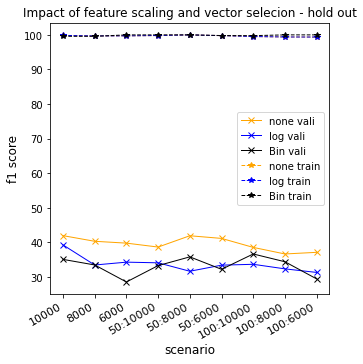

In [25]:
vals      = np.arange(9)
plt.figure(figsize=(5,5))
plt.plot(vals, f1_X,color="orange",marker="x", linewidth=1,label="none vali")
plt.plot(vals, f1_X_ln ,color="blue",marker="x", linewidth=1,label="log vali")
plt.plot(vals, f1_X_bin ,color="black",marker="x", linewidth=1,label="Bin vali")
plt.plot(vals, f1_X_train,"--",color="orange",marker="*", linewidth=1,label="none train")
plt.plot(vals, f1_X_ln_train,"--",color="blue",marker="*", linewidth=1,label="log train")
plt.plot(vals, f1_X_bin_train,"--",color="black",marker="*", linewidth=1,label="Bin train")
plt.legend(loc="best")
plt.title("Impact of feature scaling and vector selecion - hold out",fontsize=12)
plt.ylabel("f1 score",fontsize=12)
plt.xlabel("scenario",fontsize=12)
labels =X_names
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
plt.savefig("./RF_scaling_vect_selection_HO.pdf")

In [26]:
#Perceptron with cross validation
import warnings
warnings.filterwarnings('ignore')

accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
accuracy_X_bin ,recall_X_bin,  precision_X_bin,  accuracy_X_bin_train, recall_X_bin_train, precision_X_bin_train =  [], [], [],[], [], []
f1_X, f1_X_train, f1_X_ln, f1_X_ln_train, f1_X_bin, f1_X_bin_train= [],[],[],[],[],[]

for X in X_range:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    f1_model, f1_model_train=[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    f1_X.append(np.mean(f1_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    f1_X_train.append(np.mean(f1_model_train))

for X in X_range_ln:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    f1_model, f1_model_train=[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model =create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X_ln.append(np.mean(accuracy_model))
    precision_X_ln.append(np.mean(precision_model))
    recall_X_ln.append(np.mean(recall_model))
    f1_X_ln.append(np.mean(f1_model))
    accuracy_X_ln_train.append(np.mean(accuracy_model_train))
    precision_X_ln_train.append(np.mean(precision_model_train))
    recall_X_ln_train.append(np.mean(recall_model_train))
    f1_X_ln_train.append(np.mean(f1_model_train))
    
for X in X_range_bin:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    f1_model, f1_model_train=[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model =create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X_bin.append(np.mean(accuracy_model))
    precision_X_bin.append(np.mean(precision_model))
    recall_X_bin.append(np.mean(recall_model))
    f1_X_bin.append(np.mean(f1_model))
    accuracy_X_bin_train.append(np.mean(accuracy_model_train))
    precision_X_bin_train.append(np.mean(precision_model_train))
    recall_X_bin_train.append(np.mean(recall_model_train))
    f1_X_bin_train.append(np.mean(f1_model_train))

RF_CV_Accuracy_matrix = {'Scenario': X_names, "Basic test": accuracy_X, "Basic train": accuracy_X_train, "LN test": accuracy_X_ln, "LN train": accuracy_X_ln_train, 'Bin test':accuracy_X_bin, "Bin train": accuracy_X_bin_train }
RF_CV_Recall_matrix = {'Scenario': X_names, "Basic test": recall_X, "Basic train": recall_X_train, "LN test": recall_X_ln, "LN train": recall_X_ln_train, "Bin test": recall_X_bin, "Bin train": recall_X_bin_train}
RF_CV_Precision_matrix = {'Scenario': X_names, "Basic test": precision_X, "Basic train": precision_X_train, "LN test": precision_X_ln, "LN train": precision_X_ln_train, "Bin test": precision_X_bin, "Bin train": precision_X_bin_train }
RF_CV_f1_matrix = {'Scenario': X_names, "Basic test": f1_X, "Basic train": f1_X_train, "LN test": f1_X_ln, "LN train": f1_X_ln_train, "Bin test": f1_X_bin, "Bin train": f1_X_bin_train }
pd.DataFrame(RF_CV_Accuracy_matrix).to_csv("Random_forrest_CV_accuracy.csv")
pd.DataFrame(RF_CV_Precision_matrix).to_csv("Random_forres_CV_precision.csv")
pd.DataFrame(RF_CV_Recall_matrix).to_csv("Random_forres_CV_recall.csv")
pd.DataFrame(RF_CV_f1_matrix).to_csv("Perceptron_CV_recall.csv")

print(pd.DataFrame(RF_CV_Accuracy_matrix).to_latex())
print(pd.DataFrame(RF_CV_Recall_matrix).to_latex())
print(pd.DataFrame(RF_CV_Precision_matrix).to_latex())
print(pd.DataFrame(RF_CV_f1_matrix).to_latex())


\begin{tabular}{llrrrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &   LN train &   Bin test &  Bin train \\
\midrule
0 &      10000 &   46.222564 &    99.703812 &  46.808604 &  99.720259 &  44.429324 &  99.868286 \\
1 &       8000 &   48.432836 &    99.703731 &  49.174715 &  99.736652 &  45.766023 &  99.901262 \\
2 &       6000 &   46.804214 &    99.868340 &  47.098332 &  99.851892 &  45.632133 &  99.934183 \\
3 &   50:10000 &   47.245391 &    99.325143 &  47.396839 &  99.341618 &  45.476295 &  99.884760 \\
4 &    50:8000 &   45.037313 &    99.489644 &  45.041703 &  99.506145 &  47.249781 &  99.901235 \\
5 &    50:6000 &   46.661545 &    99.720286 &  47.695347 &  99.720286 &  47.107112 &  99.934129 \\
6 &  100:10000 &   45.610184 &    99.193429 &  46.341089 &  99.176954 &  46.202809 &  99.785995 \\
7 &   100:8000 &   46.501317 &    99.226215 &  46.652766 &  99.226215 &  47.258560 &  99.835310 \\
8 &   100:6000 &   44.721247 &    99.374404 &  44.725637 &  99.3

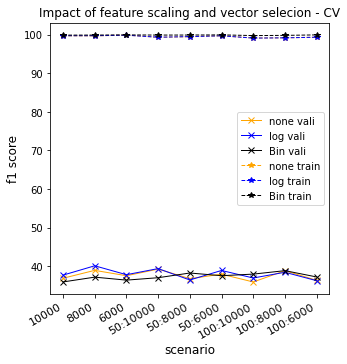

In [27]:
vals      = np.arange(9)
plt.figure(figsize=(5,5))
plt.plot(vals, f1_X,color="orange",marker="x", linewidth=1,label="none vali")
plt.plot(vals, f1_X_ln ,color="blue",marker="x", linewidth=1,label="log vali")
plt.plot(vals, f1_X_bin ,color="black",marker="x", linewidth=1,label="Bin vali")
plt.plot(vals, f1_X_train,"--",color="orange",marker="*", linewidth=1,label="none train")
plt.plot(vals, f1_X_ln_train,"--",color="blue",marker="*", linewidth=1,label="log train")
plt.plot(vals, f1_X_bin_train,"--",color="black",marker="*", linewidth=1,label="Bin train")
plt.legend(loc="best")
plt.title("Impact of feature scaling and vector selecion - CV",fontsize=12)
plt.ylabel("f1 score",fontsize=12)
plt.xlabel("scenario",fontsize=12)
labels =X_names
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
plt.savefig("./RF_scaling_vect_selection_CV.pdf")

In [28]:
#Random forrest with cross validation N-estimators
import warnings
warnings.filterwarnings('ignore')
n_estimator_range = [1,5,10,50,70, 100, 200]
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
accuracy_X_bin ,recall_X_bin,  precision_X_bin,  accuracy_X_bin_train, recall_X_bin_train, precision_X_bin_train =  [], [], [],[], [], []
f1_X, f1_X_train, f1_X_ln, f1_X_ln_train, f1_X_bin, f1_X_bin_train= [],[],[],[],[],[]


X = np.log(dataset.iloc[:, :8000]+
kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for n_estimators in n_estimator_range:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    f1_model, f1_model_train=[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    f1_X.append(np.mean(f1_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    f1_X_train.append(np.mean(f1_model_train))
    
RF_Accuracy_matrix_n_estimators = {'Scenario': n_estimator_range, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
RF_Recall_matrix_n_estimators = {'Scenario': n_estimator_range, "Basic test": recall_X, "Basic train": recall_X_train}
RF_Precision_matrix_n_estimators = {'Scenario': n_estimator_range, "Basic test": precision_X, "Basic train": precision_X_train}
RF_f1_matrix_n_estimators = {'Scenario': n_estimator_range, "Basic test": f1_X, "Basic train": f1_X_train}
pd.DataFrame(RF_Accuracy_matrix_n_estimators).to_csv("Random_forest_accuracy_nestimators.csv")
pd.DataFrame(RF_Recall_matrix_n_estimators).to_csv("Random_forest_recall_nestimators.csv")
pd.DataFrame(RF_Precision_matrix_n_estimators).to_csv("Random_forest_precision_nestimators.csv")
pd.DataFrame(RF_f1_matrix_n_estimators).to_csv("Random_forest_recall_nestimators.csv")

print(pd.DataFrame(RF_Accuracy_matrix_n_estimators).to_latex())
print(pd.DataFrame(RF_Recall_matrix_n_estimators).to_latex())
print(pd.DataFrame(RF_Precision_matrix_n_estimators).to_latex())
print(pd.DataFrame(RF_f1_matrix_n_estimators).to_latex())    
    


\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         1 &    9.629061 &    22.815616 \\
1 &         5 &   23.977173 &    58.107631 \\
2 &        10 &   27.985075 &    75.490170 \\
3 &        50 &   41.172081 &    98.765364 \\
4 &        70 &   45.017559 &    99.357957 \\
5 &       100 &   49.174715 &    99.736652 \\
6 &       200 &   52.890694 &    99.917682 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         1 &    9.478924 &    21.631345 \\
1 &         5 &   21.875920 &    56.715044 \\
2 &        10 &   25.280116 &    74.316772 \\
3 &        50 &   37.804550 &    98.563978 \\
4 &        70 &   41.601230 &    99.204340 \\
5 &       100 &   45.166085 &    99.645171 \\
6 &       200 &   49.685366 &    99.900779 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         1 &    6.469256 &    39.53003

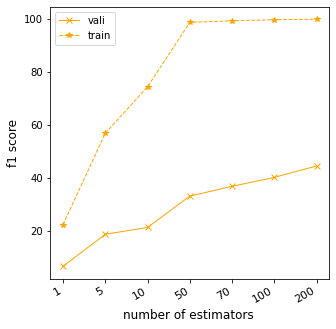

In [29]:
vals      = np.arange(7)
plt.figure(figsize=(5,5))
plt.plot(vals, f1_X,color="orange",marker="x", linewidth=1,label="vali")
plt.plot(vals, f1_X_train,"--",color="orange",marker="*", linewidth=1,label="train")
plt.legend(loc="best")
plt.title("",fontsize=12)
plt.ylabel("f1 score",fontsize=12)
plt.xlabel("number of estimators ",fontsize=12)
labels =n_estimator_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
plt.savefig("./RF_nestimators.pdf")

In [30]:
#Random forrest with cross validation Max_leaf
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
accuracy_X_bin ,recall_X_bin,  precision_X_bin,  accuracy_X_bin_train, recall_X_bin_train, precision_X_bin_train =  [], [], [],[], [], []
f1_X, f1_X_train, f1_X_ln, f1_X_ln_train, f1_X_bin, f1_X_bin_train= [],[],[],[],[],[]
max_leaf_range = [5,10, 20, 50, 100]
n_estimators=200

X = np.log(dataset.iloc[:, :8000]+1)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for max_leaf in max_leaf_range:
    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    f1_model, f1_model_train=[], []
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    f1_X.append(np.mean(f1_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    f1_X_train.append(np.mean(f1_model_train))
    
RF_Accuracy_matrix_max_leaf = {'Max leaf': max_leaf_range, "Basic vali": accuracy_X, "Basic train": accuracy_X_train}
RF_Recall_matrix_max_leaf = {'Max leaf': max_leaf_range, "Basic vali": recall_X, "Basic train": recall_X_train}
RF_Precision_matrix_max_leaf = {'Max leaf': max_leaf_range, "Basic vali": precision_X, "Basic train": precision_X_train}
RF_f1_matrix_max_leaf = {'Max leaf': max_leaf_range, "Basic vali": f1_X, "Basic train": f1_X_train}
pd.DataFrame(RF_Accuracy_matrix_max_leaf).to_csv("Random_forest_CV_max_leaf_accuracy.csv")
pd.DataFrame(RF_Precision_matrix_max_leaf).to_csv("Random_forest_CV_max_leaf_precision.csv")
pd.DataFrame(RF_Recall_matrix_max_leaf).to_csv("Random_forrest_CV_max_leaf_recall.csv")
pd.DataFrame(RF_f1_matrix_max_leaf ).to_csv("Random_forrest_CV_max_leaf_f1.csv")

print(pd.DataFrame(RF_Accuracy_matrix_max_leaf).to_latex())
print(pd.DataFrame(RF_Precision_matrix_max_leaf).to_latex())
print(pd.DataFrame(RF_Recall_matrix_max_leaf).to_latex())
print(pd.DataFrame(RF_f1_matrix_max_leaf).to_latex())


\begin{tabular}{lrrr}
\toprule
{} &  Max leaf &  Basic vali &  Basic train \\
\midrule
0 &         5 &   33.320896 &    62.386928 \\
1 &        10 &   41.180860 &    83.160984 \\
2 &        20 &   49.771730 &    96.658746 \\
3 &        50 &   52.890694 &    99.917682 \\
4 &       100 &   51.251097 &    99.967051 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Max leaf &  Basic vali &  Basic train \\
\midrule
0 &         5 &   27.177536 &    72.870424 \\
1 &        10 &   34.601267 &    88.698559 \\
2 &        20 &   43.361083 &    97.772439 \\
3 &        50 &   46.044798 &    99.937920 \\
4 &       100 &   45.380010 &    99.976471 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Max leaf &  Basic vali &  Basic train \\
\midrule
0 &         5 &   33.065188 &    57.776925 \\
1 &        10 &   40.282696 &    79.918441 \\
2 &        20 &   47.032762 &    95.632451 \\
3 &        50 &   49.685366 &    99.900779 \\
4 &       100 &   48.744341 &    99.95142

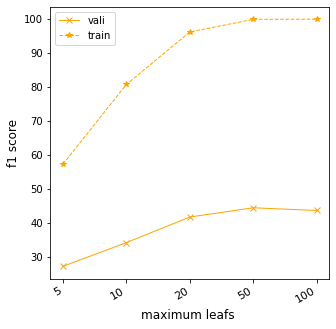

In [31]:
vals      = np.arange(5)
plt.figure(figsize=(5,5))
plt.plot(vals, f1_X,color="orange",marker="x", linewidth=1,label="vali")
plt.plot(vals, f1_X_train,"--",color="orange",marker="*", linewidth=1,label="train")
plt.legend(loc="best")
plt.title("",fontsize=12)
plt.ylabel("f1 score",fontsize=12)
plt.xlabel("maximum leafs ",fontsize=12)
labels =max_leaf_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
plt.savefig("./RF_max_leafs.pdf")

In [32]:
#Random forrest with cross validation Max_depth
import warnings
warnings.filterwarnings('ignore')

accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
accuracy_X_bin ,recall_X_bin,  precision_X_bin,  accuracy_X_bin_train, recall_X_bin_train, precision_X_bin_train =  [], [], [],[], [], []
f1_X, f1_X_train, f1_X_ln, f1_X_ln_train, f1_X_bin, f1_X_bin_train= [],[],[],[],[],[]
max_depth_range = [2, 3, 4, 5, 8, 10, 50 , 100]
max_leaf= 50
n_estimators=200

X = np.log(dataset.iloc[:, :8000]+1)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for max_depth in max_depth_range:
    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    f1_model, f1_model_train=[], []
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    f1_X.append(np.mean(f1_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    f1_X_train.append(np.mean(f1_model_train))
    
RF_Accuracy_matrix_max_depth = {'Scenario': max_depth_range, "Basic vali": accuracy_X, "Basic train": accuracy_X_train}
RF_Recall_matrix_max_depth = {'Scenario': max_depth_range, "Basic vali": recall_X, "Basic train": recall_X_train}
RF_Precision_matrix_max_depth = {'Scenario': max_depth_range, "Basic vali": precision_X, "Basic train": precision_X_train}
RF_f1_matrix_max_depth = {'Scenario': max_depth_range, "Basic vali": f1_X, "Basic train": f1_X_train}
pd.DataFrame(RF_Accuracy_matrix_max_depth).to_csv("Random_forest_CV_max_depth_accuracy.csv")
pd.DataFrame(RF_Precision_matrix_max_depth).to_csv("Random_forest_CV_max_depth_precision.csv")
pd.DataFrame(RF_Recall_matrix_max_depth).to_csv("Random_forest_CV_max_depth_recall.csv")
pd.DataFrame(RF_f1_matrix_max_depth).to_csv("Random_forest_CV_max_depth_f1.csv")

print(pd.DataFrame(RF_Accuracy_matrix_max_depth).to_latex())
print(pd.DataFrame(RF_Precision_matrix_max_depth).to_latex())
print(pd.DataFrame(RF_Recall_matrix_max_depth).to_latex())
print(pd.DataFrame(RF_f1_matrix_max_depth).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic vali &  Basic train \\
\midrule
0 &         2 &   27.249781 &    51.704240 \\
1 &         3 &   32.879719 &    71.210413 \\
2 &         4 &   36.887621 &    84.905191 \\
3 &         5 &   42.952151 &    93.333153 \\
4 &         8 &   48.145303 &    99.670890 \\
5 &        10 &   52.890694 &    99.917682 \\
6 &        50 &   56.009658 &    99.868340 \\
7 &       100 &   56.009658 &    99.868340 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic vali &  Basic train \\
\midrule
0 &         2 &   22.583273 &    62.915325 \\
1 &         3 &   27.391096 &    84.439267 \\
2 &         4 &   29.845704 &    91.592465 \\
3 &         5 &   37.015160 &    96.015099 \\
4 &         8 &   40.679426 &    99.758809 \\
5 &        10 &   46.044798 &    99.937920 \\
6 &        50 &   49.928684 &    99.899844 \\
7 &       100 &   49.928684 &    99.899844 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} & 

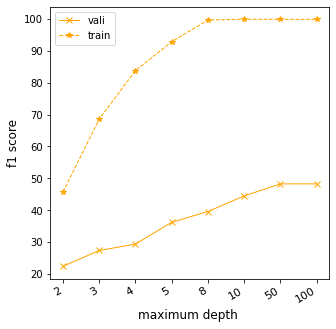

In [34]:
vals      = np.arange(8)
plt.figure(figsize=(5,5))
plt.plot(vals, f1_X,color="orange",marker="x", linewidth=1,label="vali")
plt.plot(vals, f1_X_train,"--",color="orange",marker="*", linewidth=1,label="train")
plt.legend(loc="best")
plt.title("",fontsize=12)
plt.ylabel("f1 score",fontsize=12)
plt.xlabel("maximum depth ",fontsize=12)
labels =max_depth_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
plt.savefig("./RF_max_depth.pdf")

In [35]:
#Random forrest with cross validation CCP alpha
import warnings
warnings.filterwarnings('ignore')

accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
accuracy_X_bin ,recall_X_bin,  precision_X_bin,  accuracy_X_bin_train, recall_X_bin_train, precision_X_bin_train =  [], [], [],[], [], []
f1_X, f1_X_train, f1_X_ln, f1_X_ln_train, f1_X_bin, f1_X_bin_train= [],[],[],[],[],[]

ccp_alpha_range = [1e-5, 2e-5, 1e-4, 2e-4, 1e-3, 5e-3, 75e-4,  1e-2]
n_estimators=200
max_leaf= 50
max_depth= 50

X = np.log(dataset.iloc[:, :8000]+1)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)
for ccp_alpha in ccp_alpha_range:
    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    f1_model, f1_model_train=[], []
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    f1_X.append(np.mean(f1_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    f1_X_train.append(np.mean(f1_model_train))
    
RF_Accuracy_matrix_ccp_alpha = {'Scenario': ccp_alpha_range, "Basic vali": accuracy_X, "Basic train": accuracy_X_train}
RF_Recall_matrix_ccp_alpha  = {'Scenario': ccp_alpha_range, "Basic vali": recall_X, "Basic train": recall_X_train}
RF_Precision_matrix_ccp_alpha  = {'Scenario': ccp_alpha_range, "Basic vali": precision_X, "Basic train": precision_X_train}
RF_f1_matrix_ccp_alpha  = {'Scenario': ccp_alpha_range, "Basic vali": f1_X, "Basic train": f1_X_train}
pd.DataFrame(RF_Accuracy_matrix_ccp_alpha ).to_csv("Random_forest_CV_ccpalpha_accuracy.csv")
pd.DataFrame(RF_Precision_matrix_ccp_alpha ).to_csv("Random_forest_CV_ccpalpha_precision.csv")
pd.DataFrame(RF_Recall_matrix_ccp_alpha ).to_csv("Random_forest_CV_ccpalpha_recall.csv")
pd.DataFrame(RF_f1_matrix_ccp_alpha ).to_csv("Random_forest_CV_max_ccpalpha_f1.csv")

print(pd.DataFrame(RF_Accuracy_matrix_ccp_alpha ).to_latex())
print(pd.DataFrame(RF_Precision_matrix_ccp_alpha ).to_latex())
print(pd.DataFrame(RF_Recall_matrix_ccp_alpha ).to_latex())
print(pd.DataFrame(RF_f1_matrix_ccp_alpha ).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic vali &  Basic train \\
\midrule
0 &   0.00001 &   56.009658 &    99.868340 \\
1 &   0.00002 &   56.009658 &    99.868340 \\
2 &   0.00010 &   56.009658 &    99.868340 \\
3 &   0.00020 &   56.009658 &    99.868340 \\
4 &   0.00100 &   56.009658 &    99.868340 \\
5 &   0.00500 &   56.009658 &    99.868340 \\
6 &   0.00750 &   51.558385 &    98.008351 \\
7 &   0.01000 &   39.708077 &    73.959101 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic vali &  Basic train \\
\midrule
0 &   0.00001 &   49.928684 &    99.899844 \\
1 &   0.00002 &   49.928684 &    99.899844 \\
2 &   0.00010 &   49.928684 &    99.899844 \\
3 &   0.00020 &   49.928684 &    99.899844 \\
4 &   0.00100 &   49.928684 &    99.899844 \\
5 &   0.00500 &   49.928684 &    99.899844 \\
6 &   0.00750 &   45.875004 &    98.573701 \\
7 &   0.01000 &   32.529915 &    81.495665 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} & 

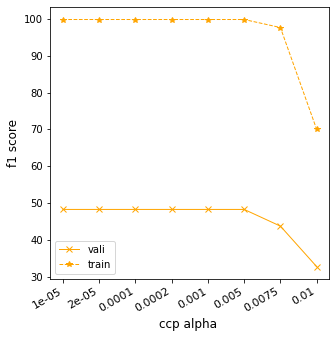

In [36]:
vals      = np.arange(8)
plt.figure(figsize=(5,5))
plt.plot(vals, f1_X,color="orange",marker="x", linewidth=1,label="vali")
plt.plot(vals, f1_X_train,"--",color="orange",marker="*", linewidth=1,label="train")
plt.legend(loc="best")
plt.title("",fontsize=12)
plt.ylabel("f1 score",fontsize=12)
plt.xlabel("ccp alpha ",fontsize=12)
labels =ccp_alpha_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
plt.savefig("./RF_ccp_alpha.pdf")

In [46]:
import warnings
warnings.filterwarnings('ignore')
accuracy_model, precision_model, recall_model, f1_model=[], [], [], []
X = np.log(dataset.iloc[:, :8000]+1)
ccp_alpha = 5e-3
max_leaf = 50
max_depth = 50
n_estimators = 200
model = create_rnd_forrest(X, dataset["Class"], ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:, 0:8000]+1)), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:, 0:8000]+1)), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:, 0:8000]+1)), average="macro") * 100)
f1_model=(f1_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:, 0:8000]+1)), average="macro") * 100)
#accuracy_X=(np.mean(accuracy_model))
print(accuracy_model)
print(precision_model)
print(recall_model)
print(f1_model)
#print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model)

58.666666666666664
56.060606060606055
54.848484848484844
51.80440771349861


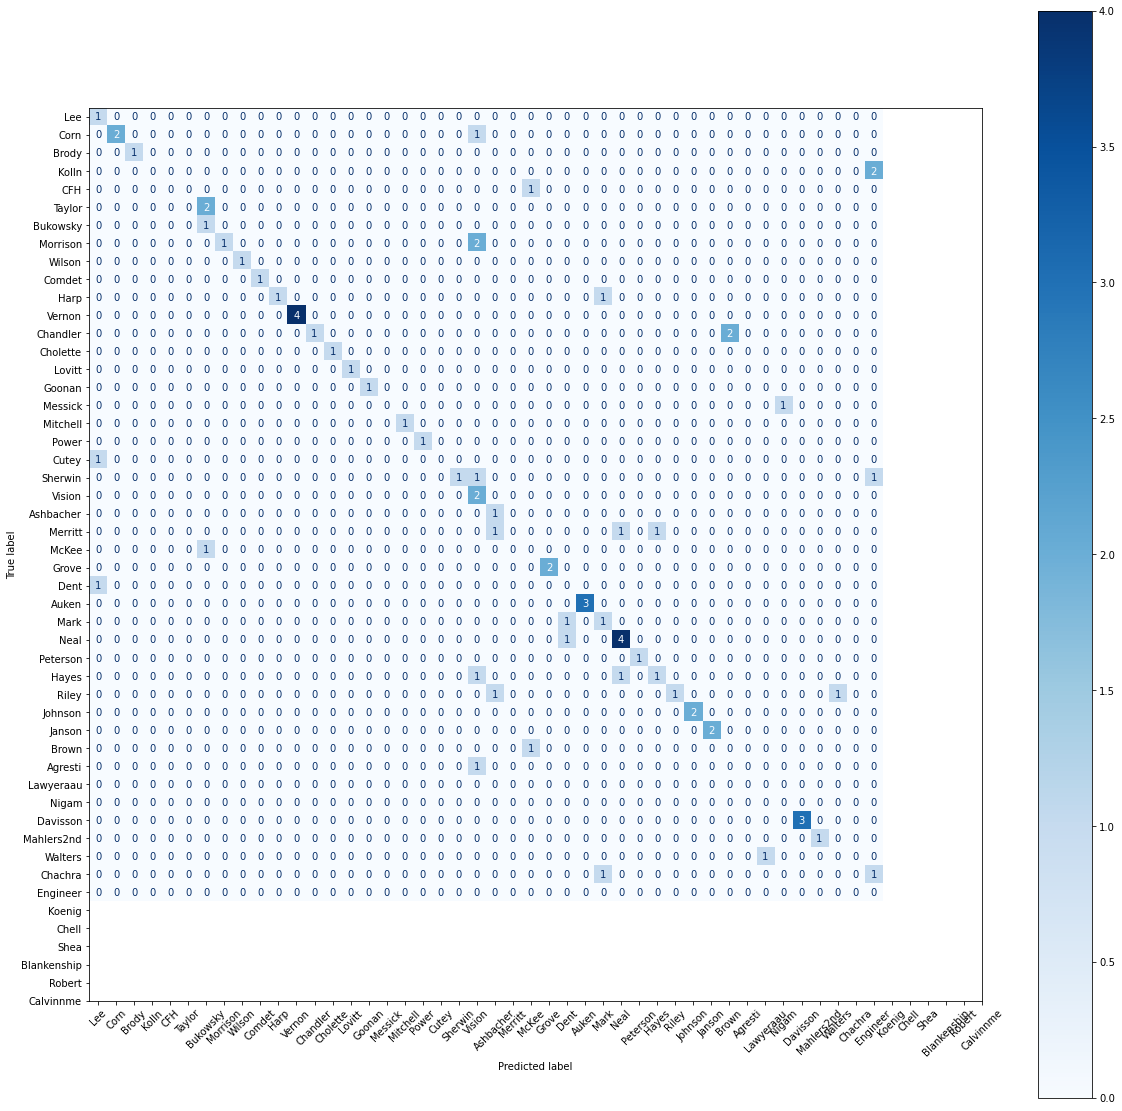

In [47]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(model, np.log(validation_set.iloc[:, 0:8000]+1),validation_set["Class"], ax=ax, cmap='Blues')
tick_marks = np.arange(len(dataset_['Class'].unique()))
plt.xticks(tick_marks, dataset_['Class'].unique(), rotation=45)
plt.yticks(tick_marks, dataset_['Class'].unique())
plt.show() 

In [38]:
import warnings
warnings.filterwarnings('ignore')
accuracy_model, precision_model, recall_model, f1_model=[], [], [], []
X = np.log(dataset.iloc[:,100 :4500]+1)
ccp_alpha = 5e-3
max_leaf = 50
max_depth = 50
n_estimators = 200
model = create_rnd_forrest(X, dataset["Class"], ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:, 100:4500]+1)), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:, 100:4500]+1)), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:, 100:4500]+1)), average="macro") * 100)
f1_model=(f1_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:, 100:4500]+1)), average="macro") * 100)
print(accuracy_model)
print(precision_model)
print(recall_model)
print(f1_model)
#print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model)

54.666666666666664
46.6304347826087
49.275362318840585
45.24750611707134


# Naive Bayes

In [48]:
#Naive Bayes base parameters
alpha = 1
X_names_2=["100:5500", "100:5000", "100:4500", "100:4000", "100:3500"]
X_range_2 = [dataset.iloc[:, 100:5500], dataset.iloc[:, 100:5000], dataset.iloc[:, 100:4500], dataset.iloc[:, 100:4000], dataset.iloc[:, 100:3500]]
X_bin_range_2 = [dataset_bin.iloc[:, 100:5500], dataset_bin.iloc[:, 100:5000], dataset_bin.iloc[:, 100:4500], dataset_bin.iloc[:, 100:4000], dataset_bin.iloc[:, 100:3500]]
X_names_3=["150:4500", "200:4500", "250:4500", "300:4500", "350:4500", "150:4000", "200:4000", "250:4000", "300:4000", "350:4000"]
X_range_3 = [dataset.iloc[:, 150:4500], dataset.iloc[:, 200:4500], dataset.iloc[:, 250:4500], dataset.iloc[:, 300:4500], dataset.iloc[:, 350:4500], dataset.iloc[:, 150:4000], dataset.iloc[:, 200:4000], dataset.iloc[:, 250:4000], dataset.iloc[:, 300:4000], dataset.iloc[:, 350:4000]]
X_range_3 = [dataset_bin.iloc[:, 150:4500],dataset_bin.iloc[:, 200:4500], dataset_bin.iloc[:, 250:4500], dataset_bin.iloc[:, 300:4500],dataset_bin.iloc[:, 350:4500], dataset_bin.iloc[:, 150:4000], dataset_bin.iloc[:, 200:4000],dataset_bin.iloc[:, 250:4000], dataset_bin.iloc[:, 300:4000], dataset_bin.iloc[:, 350:4000]]
X_names_4=["200:5500", "200:5000", "200:4500", "200:4000", "200:3500"]
X_range_4 = [dataset.iloc[:, 200:5500], dataset.iloc[:, 200:5000], dataset.iloc[:, 200:4500], dataset.iloc[:, 200:4000], dataset.iloc[:, 200:3500]]

In [49]:
#Naive Bayes with hold out
import warnings
warnings.filterwarnings('ignore')

accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
accuracy_X_bin ,recall_X_bin,  precision_X_bin,  accuracy_X_bin_train, recall_X_bin_train, precision_X_bin_train =  [], [], [],[], [], []
f1_X, f1_X_train, f1_X_ln, f1_X_ln_train, f1_X_bin, f1_X_bin_train= [],[],[],[],[],[]

for X in X_range:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model =  create_nb(X_train, y_train, alpha)
    accuracy_X.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X.append(f1_score(y_test, model.predict(X_test), average="macro") * 100)
    f1_X.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    accuracy_X_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    f1_X_train.append(f1_score(y_train, model.predict(X_train), average="macro") * 100)
    
for X in X_range_ln:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model =  create_nb(X_train, y_train, alpha)
    # Append to accuracy_model the accuracy of the model
    accuracy_X_ln.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X_ln.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X_ln.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    f1_X_ln.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
    accuracy_X_ln_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_ln_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_ln_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    f1_X_ln_train.append(f1_score(y_train, model.predict(X_train), average="macro") * 100)
    
for X in X_range_bin:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model =  create_nb(X_train, y_train, alpha)
    # Append to accuracy_model the accuracy of the model
    accuracy_X_bin.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X_bin.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X_bin.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    f1_X_bin.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
    accuracy_X_bin_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_bin_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_bin_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    f1_X_bin_train.append(f1_score(y_train, model.predict(X_train), average="macro") * 100)

NB_Accuracy_matrix = {'Scenario': X_names, "Basic vali": accuracy_X, "Basic train": accuracy_X_train, "LN vali": accuracy_X_ln, "LN train": accuracy_X_ln_train, "Bin vali": accuracy_X_bin, "Bin train": accuracy_X_bin_train}
NB_Recall_matrix = {'Scenario': X_names, "Basic vali": recall_X, "Basic train": recall_X_train, "LN vali": recall_X_ln, "LN train": recall_X_ln_train, "Bin vali": recall_X_bin, "Bin train": recall_X_bin_train}
NB_Precision_matrix = {'Scenario': X_names, "Basic vali": precision_X, "Basic train": precision_X_train, "LN vali": precision_X_ln, "LN train": precision_X_ln_train, "Bin vali": precision_X_bin, "Bin train": precision_X_bin_train}
NB_f1_matrix = {'Scenario': X_names, "Basic vali": f1_X, "Basic train": f1_X_train, "LN vali": f1_X_ln, "LN train": f1_X_ln_train, "Bin vali": f1_X_bin, "Bin train": f1_X_bin_train}
pd.DataFrame(NB_Accuracy_matrix).to_csv("Naive_Bayes__hold_out_accuracy.csv")
pd.DataFrame(NB_Precision_matrix).to_csv("Naive_Bayes_hold_out_precision.csv")
pd.DataFrame(NB_Recall_matrix).to_csv("Naive_Bayes_hold_out_recall.csv")
pd.DataFrame(NB_f1_matrix).to_csv("Naive_Bayes_hold_out_f1.csv")

print(pd.DataFrame(NB_Accuracy_matrix).to_latex())
print(pd.DataFrame(NB_Recall_matrix).to_latex())
print(pd.DataFrame(NB_Precision_matrix).to_latex())
print(pd.DataFrame(NB_f1_matrix).to_latex())

\begin{tabular}{llrrrrrr}
\toprule
{} &   Scenario &  Basic vali &  Basic train &    LN vali &    LN train &   Bin vali &  Bin train \\
\midrule
0 &      10000 &   35.555556 &    99.074074 &  23.703704 &   95.925926 &  26.666667 &      100.0 \\
1 &       8000 &   41.481481 &    99.814815 &  30.370370 &   99.074074 &  34.074074 &      100.0 \\
2 &       6000 &   47.407407 &    99.814815 &  41.481481 &  100.000000 &  44.444444 &      100.0 \\
3 &   50:10000 &   38.518519 &    99.629630 &  25.925926 &   96.481481 &  26.666667 &      100.0 \\
4 &    50:8000 &   42.222222 &    99.814815 &  31.851852 &   99.444444 &  34.074074 &      100.0 \\
5 &    50:6000 &   48.148148 &    99.814815 &  41.481481 &  100.000000 &  44.444444 &      100.0 \\
6 &  100:10000 &   39.259259 &    99.814815 &  25.925926 &   98.148148 &  26.666667 &      100.0 \\
7 &   100:8000 &   41.481481 &    99.814815 &  33.333333 &   99.814815 &  34.814815 &      100.0 \\
8 &   100:6000 &   48.888889 &    99.814815 &  41.48148

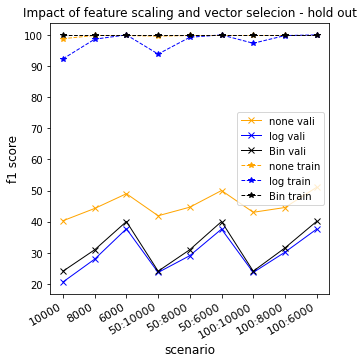

In [50]:
vals      = np.arange(9)
plt.figure(figsize=(5,5))
plt.plot(vals, f1_X,color="orange",marker="x", linewidth=1,label="none vali")
plt.plot(vals, f1_X_ln ,color="blue",marker="x", linewidth=1,label="log vali")
plt.plot(vals, f1_X_bin ,color="black",marker="x", linewidth=1,label="Bin vali")
plt.plot(vals, f1_X_train,"--",color="orange",marker="*", linewidth=1,label="none train")
plt.plot(vals, f1_X_ln_train,"--",color="blue",marker="*", linewidth=1,label="log train")
plt.plot(vals, f1_X_bin_train,"--",color="black",marker="*", linewidth=1,label="Bin train")
plt.legend(loc="best")
plt.title("Impact of feature scaling and vector selecion - hold out",fontsize=12)
plt.ylabel("f1 score",fontsize=12)
plt.xlabel("scenario",fontsize=12)
labels =X_names
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
plt.savefig("./NB_scaling_vect_selection_HO.pdf")

In [51]:
#Perceptron with cross validation
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
accuracy_X_bin ,recall_X_bin,  precision_X_bin,  accuracy_X_bin_train, recall_X_bin_train, precision_X_bin_train =  [], [], [],[], [], []
f1_X, f1_X_train, f1_X_ln, f1_X_ln_train, f1_X_bin, f1_X_bin_train= [],[],[],[],[],[]

for X in X_range:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    f1_model, f1_model_train=[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_nb(X_train, y_train, alpha)
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    f1_X.append(np.mean(f1_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    f1_X_train.append(np.mean(f1_model_train))

for X in X_range_ln:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    f1_model, f1_model_train=[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model =create_nb(X_train, y_train, alpha)
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X_ln.append(np.mean(accuracy_model))
    precision_X_ln.append(np.mean(precision_model))
    recall_X_ln.append(np.mean(recall_model))
    f1_X_ln.append(np.mean(f1_model))
    accuracy_X_ln_train.append(np.mean(accuracy_model_train))
    precision_X_ln_train.append(np.mean(precision_model_train))
    recall_X_ln_train.append(np.mean(recall_model_train))
    f1_X_ln_train.append(np.mean(f1_model_train))
    
for X in X_range_bin:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    f1_model, f1_model_train=[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model =create_nb(X_train, y_train, alpha)
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X_bin.append(np.mean(accuracy_model))
    precision_X_bin.append(np.mean(precision_model))
    recall_X_bin.append(np.mean(recall_model))
    f1_X_bin.append(np.mean(f1_model))
    accuracy_X_bin_train.append(np.mean(accuracy_model_train))
    precision_X_bin_train.append(np.mean(precision_model_train))
    recall_X_bin_train.append(np.mean(recall_model_train))
    f1_X_bin_train.append(np.mean(f1_model_train))

NB_CV_Accuracy_matrix = {'Scenario': X_names, "Basic vali": accuracy_X, "Basic train": accuracy_X_train, "LN vali": accuracy_X_ln, "LN train": accuracy_X_ln_train, "Bin vali": accuracy_X_bin, "Bin train": accuracy_X_bin_train}
NB_CV_Recall_matrix = {'Scenario': X_names, "Basic vali": recall_X, "Basic train": recall_X_train, "LN vali": recall_X_ln, "LN train": recall_X_ln_train, "Bin vali": recall_X_bin, "Bin train": recall_X_bin_train}
NB_CV_Precision_matrix = {'Scenario': X_names, "Basic vali": precision_X, "Basic train": precision_X_train, "LN vali": precision_X_ln, "LN train": precision_X_ln_train, "Bin vali": precision_X_bin, "Bin train": precision_X_bin_train}
NB_CV_f1_matrix = {'Scenario': X_names, "Basic vali": f1_X, "Basic train": f1_X_train, "LN vali": f1_X_ln, "LN train": f1_X_ln_train, "Bin vali": f1_X_bin, "Bin train": f1_X_bin_train}
pd.DataFrame(NB_CV_Accuracy_matrix).to_csv("Naive_Bayes_CV_accuracy.csv")
pd.DataFrame(NB_CV_Precision_matrix).to_csv("Naive_Bayes_CV_precision.csv")
pd.DataFrame(NB_CV_Recall_matrix).to_csv("Naive_Bayes_CV_recall.csv")
pd.DataFrame(NB_CV_f1_matrix).to_csv("Naive_Bayes_CV_f1l.csv")

print(pd.DataFrame(NB_CV_Accuracy_matrix).to_latex())
print(pd.DataFrame(NB_CV_Recall_matrix).to_latex())
print(pd.DataFrame(NB_CV_Precision_matrix).to_latex())
print(pd.DataFrame(NB_CV_f1_matrix).to_latex())

\begin{tabular}{llrrrrrr}
\toprule
{} &   Scenario &  Basic vali &  Basic train &    LN vali &    LN train &   Bin vali &  Bin train \\
\midrule
0 &      10000 &   46.962248 &    99.308669 &  34.207638 &   97.958846 &  36.727392 &      100.0 \\
1 &       8000 &   52.153205 &    99.835472 &  42.811677 &   99.407515 &  44.593942 &      100.0 \\
2 &       6000 &   56.150132 &    99.851838 &  51.850307 &  100.000000 &  52.587796 &      100.0 \\
3 &   50:10000 &   48.737928 &    99.637914 &  34.800263 &   98.452701 &  36.874451 &      100.0 \\
4 &    50:8000 &   53.336260 &    99.884841 &  43.996927 &   99.654361 &  45.482880 &      100.0 \\
5 &    50:6000 &   57.631694 &    99.868313 &  51.999561 &  100.000000 &  52.587796 &      100.0 \\
6 &  100:10000 &   49.633450 &    99.687283 &  35.399473 &   98.666625 &  36.725198 &      100.0 \\
7 &   100:8000 &   53.336260 &    99.917736 &  44.143986 &   99.703758 &  45.629939 &      100.0 \\
8 &   100:6000 &   57.928007 &    99.934156 &  52.89288

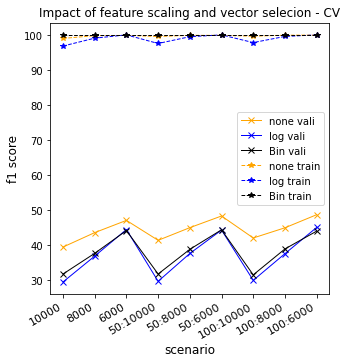

In [52]:
vals      = np.arange(9)
plt.figure(figsize=(5,5))
plt.plot(vals, f1_X,color="orange",marker="x", linewidth=1,label="none vali")
plt.plot(vals, f1_X_ln ,color="blue",marker="x", linewidth=1,label="log vali")
plt.plot(vals, f1_X_bin ,color="black",marker="x", linewidth=1,label="Bin vali")
plt.plot(vals, f1_X_train,"--",color="orange",marker="*", linewidth=1,label="none train")
plt.plot(vals, f1_X_ln_train,"--",color="blue",marker="*", linewidth=1,label="log train")
plt.plot(vals, f1_X_bin_train,"--",color="black",marker="*", linewidth=1,label="Bin train")
plt.legend(loc="best")
plt.title("Impact of feature scaling and vector selecion - CV",fontsize=12)
plt.ylabel("f1 score",fontsize=12)
plt.xlabel("scenario",fontsize=12)
labels =X_names
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
plt.savefig("./NB_scaling_vect_selection_CV.pdf")

In [53]:
#Learning rate 
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
accuracy_X_bin ,recall_X_bin,  precision_X_bin,  accuracy_X_bin_train, recall_X_bin_train, precision_X_bin_train =  [], [], [],[], [], []
f1_X, f1_X_train, f1_X_ln, f1_X_ln_train, f1_X_bin, f1_X_bin_train= [],[],[],[],[],[]

alpha_range=[1e-3, 1e-2, 1e-1, 0.5, 1, 10, 100, 1000]
X = dataset.iloc[:,100:6000]

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for alpha in alpha_range:
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    f1_model, f1_model_train=[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_nb(X_train, y_train, alpha)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    f1_X.append(np.mean(f1_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    f1_X_train.append(np.mean(f1_model_train))
    
NB_Alpha_Accuracy_matrix = {'Scenario': alpha_range, "Basic vali": accuracy_X, "Basic train": accuracy_X_train}
NB_Alpha_Recall_matrix = {'Scenario': alpha_range, "Basic vali": recall_X, "Basic train": recall_X_train}
NB_Alpha_Precision_matrix = {'Scenario': alpha_range, "Basic vali": precision_X, "Basic train": precision_X_train}
NB_Alpha_f1_matrix = {'Scenario': alpha_range, "Basic vali": f1_X, "Basic train": f1_X_train}
pd.DataFrame(NB_Alpha_Accuracy_matrix).to_csv("Naive_Bayes_CV_alpha_accuracy.csv")
pd.DataFrame(NB_Alpha_Precision_matrix).to_csv("Naive_Bayes_Perceptron_CV_alpha_precision.csv")
pd.DataFrame(NB_Alpha_Recall_matrix).to_csv("Naive_Bayes_CV_alpha_recall.csv")
pd.DataFrame(NB_Alpha_f1_matrix).to_csv("Naive_Bayes_CV_alpha_f1.csv")

print(pd.DataFrame(NB_Alpha_Accuracy_matrix).to_latex())
print(pd.DataFrame(NB_Alpha_Recall_matrix).to_latex())
print(pd.DataFrame(NB_Alpha_Precision_matrix).to_latex())
print(pd.DataFrame(NB_Alpha_f1_matrix).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic vali &  Basic train \\
\midrule
0 &     0.001 &   57.928007 &    99.934156 \\
1 &     0.010 &   57.928007 &    99.934156 \\
2 &     0.100 &   57.928007 &    99.934156 \\
3 &     0.500 &   57.928007 &    99.934156 \\
4 &     1.000 &   57.928007 &    99.934156 \\
5 &    10.000 &   57.928007 &    99.934156 \\
6 &   100.000 &   57.928007 &    99.934156 \\
7 &  1000.000 &   57.928007 &    99.934156 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic vali &  Basic train \\
\midrule
0 &     0.001 &   53.294025 &    99.937179 \\
1 &     0.010 &   53.294025 &    99.937179 \\
2 &     0.100 &   53.294025 &    99.937179 \\
3 &     0.500 &   53.294025 &    99.937179 \\
4 &     1.000 &   53.294025 &    99.937179 \\
5 &    10.000 &   53.294025 &    99.937179 \\
6 &   100.000 &   53.294025 &    99.937179 \\
7 &  1000.000 &   53.294025 &    99.937179 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} & 

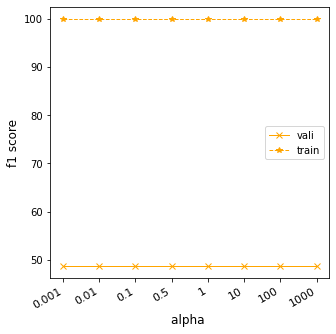

In [54]:
vals      = np.arange(8)
plt.figure(figsize=(5,5))
plt.plot(vals, f1_X,color="orange",marker="x", linewidth=1,label="vali")
plt.plot(vals, f1_X_train,"--",color="orange",marker="*", linewidth=1,label="train")
plt.legend(loc="best")
plt.title("",fontsize=12)
plt.ylabel("f1 score",fontsize=12)
plt.xlabel("alpha ",fontsize=12)
labels =alpha_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
plt.savefig("./NB_alpha.pdf")

In [55]:
#Naive Bayes with cross validation
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
accuracy_X_bin ,recall_X_bin,  precision_X_bin,  accuracy_X_bin_train, recall_X_bin_train, precision_X_bin_train =  [], [], [],[], [], []
f1_X, f1_X_train, f1_X_ln, f1_X_ln_train, f1_X_bin, f1_X_bin_train= [],[],[],[],[],[]

for X in X_range_2:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    f1_model, f1_model_train=[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_nb(X_train, y_train, alpha)
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    f1_X.append(np.mean(f1_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    f1_X_train.append(np.mean(f1_model_train))

for X in X_bin_range_2:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    f1_model, f1_model_train=[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_nb(X_train, y_train, alpha)
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X_bin.append(np.mean(accuracy_model))
    precision_X_bin.append(np.mean(precision_model))
    recall_X_bin.append(np.mean(recall_model))
    f1_X_bin.append(np.mean(f1_model))
    accuracy_X_bin_train.append(np.mean(accuracy_model_train))
    precision_X_bin_train.append(np.mean(precision_model_train))
    recall_X_bin_train.append(np.mean(recall_model_train))
    f1_X_bin_train.append(np.mean(f1_model_train))

NB_CV_2_Accuracy_matrix = {'Scenario': X_names_2, "Basic vali": accuracy_X, "Basic train": accuracy_X_train, "Bin vali": accuracy_X_bin, "Bin train": accuracy_X_bin_train}
NB_CV_2_Recall_matrix = {'Scenario': X_names_2, "Basic vali": recall_X, "Basic train": recall_X_train, "Bin vali": recall_X_bin, "Bin train": recall_X_bin_train}
NB_CV_2_Precision_matrix = {'Scenario': X_names_2, "Basic vali": precision_X, "Basic train": precision_X_train, "Bin vali": precision_X_bin, "Bin train": precision_X_bin_train}
NB_CV_2_f1_matrix = {'Scenario': X_names_2, "Basic vali": f1_X, "Basic train": f1_X_train,"Bin vali": f1_X_bin, "Bin train": f1_X_bin_train}
pd.DataFrame(NB_CV_2_Accuracy_matrix).to_csv("Naive_Bayes_CV_2_accuracy.csv")
pd.DataFrame(NB_CV_2_Precision_matrix).to_csv("Naive_Bayes_CV_2_precision.csv")
pd.DataFrame(NB_CV_2_Recall_matrix).to_csv("Naive_Bayes_CV_2_recall.csv")
pd.DataFrame(NB_CV_2_f1_matrix).to_csv("Naive_Bayes_CV_2_f1.csv")

print(pd.DataFrame(NB_CV_2_Accuracy_matrix).to_latex())
print(pd.DataFrame(NB_CV_2_Recall_matrix).to_latex())
print(pd.DataFrame(NB_CV_2_Precision_matrix).to_latex())
print(pd.DataFrame(NB_CV_2_f1_matrix ).to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &  Scenario &  Basic vali &  Basic train &   Bin vali &  Bin train \\
\midrule
0 &  100:5500 &   58.077261 &    99.934156 &  53.024583 &      100.0 \\
1 &  100:5000 &   59.253731 &    99.917709 &  53.766462 &      100.0 \\
2 &  100:4500 &   60.144864 &    99.835418 &  56.435470 &      100.0 \\
3 &  100:4000 &   60.586040 &    99.786049 &  57.320018 &      100.0 \\
4 &  100:3500 &   59.543459 &    99.720178 &  55.096576 &      100.0 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrr}
\toprule
{} &  Scenario &  Basic vali &  Basic train &   Bin vali &  Bin train \\
\midrule
0 &  100:5500 &   53.223080 &    99.937179 &  48.974881 &      100.0 \\
1 &  100:5000 &   53.849310 &    99.923846 &  49.319534 &      100.0 \\
2 &  100:4500 &   53.896135 &    99.856941 &  51.485378 &      100.0 \\
3 &  100:4000 &   54.075094 &    99.810188 &  51.390688 &      100.0 \\
4 &  100:3500 &   53.181340 &    99.746622 &  50.034899 &      100.0 \\
\bottomrule
\end{tabula

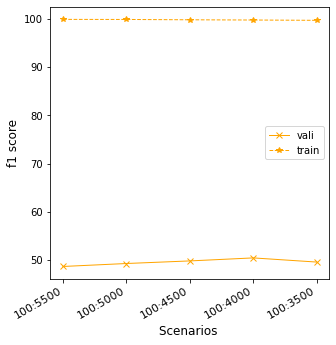

In [56]:
vals      = np.arange(5)
plt.figure(figsize=(5,5))
plt.plot(vals, f1_X,color="orange",marker="x", linewidth=1,label="vali")
plt.plot(vals, f1_X_train,"--",color="orange",marker="*", linewidth=1,label="train")
plt.legend(loc="best")
plt.title("",fontsize=12)
plt.ylabel("f1 score",fontsize=12)
plt.xlabel("Scenarios ",fontsize=12)
labels =X_names_2
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
plt.savefig("./NB_Xrange2.pdf")

In [57]:
##Naive Bayes with cross validation
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
accuracy_X_bin ,recall_X_bin,  precision_X_bin,  accuracy_X_bin_train, recall_X_bin_train, precision_X_bin_train =  [], [], [],[], [], []
f1_X, f1_X_train, f1_X_ln, f1_X_ln_train, f1_X_bin, f1_X_bin_train= [],[],[],[],[],[]

for X in X_range_3:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    f1_model, f1_model_train=[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_nb(X_train, y_train, alpha)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    f1_X.append(np.mean(f1_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    f1_X_train.append(np.mean(f1_model_train))


NB_CV_3_Accuracy_matrix = {'Scenario': X_names_3, "Basic vali": accuracy_X, "Basic train": accuracy_X_train}
NB_CV_3_Recall_matrix = {'Scenario': X_names_3, "Basic vali": recall_X, "Basic train": recall_X_train}
NB_CV_3_Precision_matrix = {'Scenario': X_names_3, "Basic vali": precision_X, "Basic train": precision_X_train}
NB_CV_3_f1_matrix = {'Scenario': X_names_3, "Basic vali": f1_X, "Basic train": f1_X_train}
pd.DataFrame(NB_CV_3_Accuracy_matrix).to_csv("Naive_Bayes_CV_3_accuracy.csv")
pd.DataFrame(NB_CV_3_Precision_matrix).to_csv("Naive_Bayes_CV_3_precision.csv")
pd.DataFrame(NB_CV_3_Recall_matrix).to_csv("Naive_Bayes_CV_3_recall.csv")
pd.DataFrame(NB_CV_3_f1_matrix).to_csv("Naive_Bayes_CV_3_f1.csv")

print(pd.DataFrame(NB_CV_3_Accuracy_matrix).to_latex())
print(pd.DataFrame(NB_CV_3_Recall_matrix).to_latex())
print(pd.DataFrame(NB_CV_3_Precision_matrix).to_latex())
print(pd.DataFrame(NB_CV_3_f1_matrix ).to_latex())

\begin{tabular}{llrr}
\toprule
{} &  Scenario &  Basic vali &  Basic train \\
\midrule
0 &  150:4500 &   56.437665 &        100.0 \\
1 &  200:4500 &   56.731782 &        100.0 \\
2 &  250:4500 &   56.139157 &        100.0 \\
3 &  300:4500 &   56.582529 &        100.0 \\
4 &  350:4500 &   56.433275 &        100.0 \\
5 &  150:4000 &   56.876646 &        100.0 \\
6 &  200:4000 &   56.727392 &        100.0 \\
7 &  250:4000 &   56.582529 &        100.0 \\
8 &  300:4000 &   56.433275 &        100.0 \\
9 &  350:4000 &   56.731782 &        100.0 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrr}
\toprule
{} &  Scenario &  Basic vali &  Basic train \\
\midrule
0 &  150:4500 &   51.839531 &        100.0 \\
1 &  200:4500 &   52.155146 &        100.0 \\
2 &  250:4500 &   51.488530 &        100.0 \\
3 &  300:4500 &   51.813681 &        100.0 \\
4 &  350:4500 &   51.369055 &        100.0 \\
5 &  150:4000 &   50.770598 &        100.0 \\
6 &  200:4000 &   51.018429 &        100.0 \\
7 &  250:4000 &  

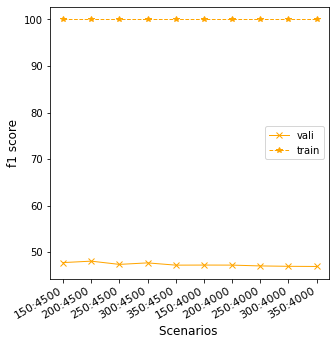

In [58]:
vals      = np.arange(10)
plt.figure(figsize=(5,5))
plt.plot(vals, f1_X,color="orange",marker="x", linewidth=1,label="vali")
plt.plot(vals, f1_X_train,"--",color="orange",marker="*", linewidth=1,label="train")
plt.legend(loc="best")
plt.title("",fontsize=12)
plt.ylabel("f1 score",fontsize=12)
plt.xlabel("Scenarios ",fontsize=12)
labels =X_names_3
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
plt.savefig("./NB_Xrange3.pdf")

In [59]:
##Naive Bayes with cross validation X range 4
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
accuracy_X_bin ,recall_X_bin,  precision_X_bin,  accuracy_X_bin_train, recall_X_bin_train, precision_X_bin_train =  [], [], [],[], [], []
f1_X, f1_X_train, f1_X_ln, f1_X_ln_train, f1_X_bin, f1_X_bin_train= [],[],[],[],[],[]

for X in X_range_4:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    f1_model, f1_model_train=[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_nb(X_train, y_train, alpha)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        f1_model.append(f1_score(y_test, model.predict(X_test), average="macro")*100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
        f1_model_train.append(f1_score(y_train, model.predict(X_train), average="macro")*100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    f1_X.append(np.mean(f1_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    f1_X_train.append(np.mean(f1_model_train))


NB_CV_4_Accuracy_matrix = {'Scenario': X_names_4, "Basic vali": accuracy_X, "Basic train": accuracy_X_train}
NB_CV_4_Recall_matrix = {'Scenario': X_names_4, "Basic vali": recall_X, "Basic train": recall_X_train}
NB_CV_4_Precision_matrix = {'Scenario': X_names_4, "Basic vali": precision_X, "Basic train": precision_X_train}
NB_CV_4_f1_matrix = {'Scenario': X_names_4, "Basic vali": f1_X, "Basic train": f1_X_train}
pd.DataFrame(NB_CV_4_Accuracy_matrix).to_csv("Naive_Bayes_CV_4_accuracy.csv")
pd.DataFrame(NB_CV_4_Precision_matrix).to_csv("Naive_Bayes_CV_4_precision.csv")
pd.DataFrame(NB_CV_4_Recall_matrix).to_csv("Naive_Bayes_CV_4_recall.csv")
pd.DataFrame(NB_CV_4_f1_matrix).to_csv("Naive_Bayes_CV_4_f1.csv")

print(pd.DataFrame(NB_CV_4_Accuracy_matrix).to_latex())
print(pd.DataFrame(NB_CV_4_Recall_matrix).to_latex())
print(pd.DataFrame(NB_CV_4_Precision_matrix).to_latex())
print(pd.DataFrame(NB_CV_4_f1_matrix ).to_latex())

\begin{tabular}{llrr}
\toprule
{} &  Scenario &  Basic vali &  Basic train \\
\midrule
0 &  200:5500 &   58.667691 &    99.967105 \\
1 &  200:5000 &   59.558824 &    99.967105 \\
2 &  200:4500 &   59.995610 &    99.950631 \\
3 &  200:4000 &   59.846356 &    99.901262 \\
4 &  200:3500 &   58.808165 &    99.818943 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrr}
\toprule
{} &  Scenario &  Basic vali &  Basic train \\
\midrule
0 &  200:5500 &   52.971141 &    99.969231 \\
1 &  200:5000 &   53.285914 &    99.969231 \\
2 &  200:4500 &   53.788220 &    99.956731 \\
3 &  200:4000 &   53.479085 &    99.917564 \\
4 &  200:3500 &   52.377029 &    99.842656 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrr}
\toprule
{} &  Scenario &  Basic vali &  Basic train \\
\midrule
0 &  200:5500 &   51.178599 &    99.970330 \\
1 &  200:5000 &   51.089451 &    99.970330 \\
2 &  200:4500 &   52.663244 &    99.959219 \\
3 &  200:4000 &   52.919725 &    99.914667 \\
4 &  200:3500 &   51.493001 &    99.84371

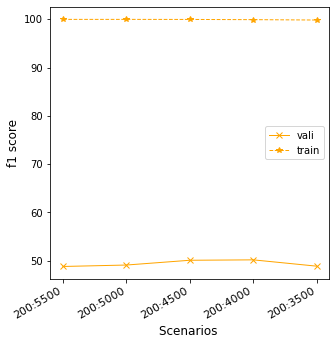

In [60]:
vals      = np.arange(5)
plt.figure(figsize=(5,5))
plt.plot(vals, f1_X,color="orange",marker="x", linewidth=1,label="vali")
plt.plot(vals, f1_X_train,"--",color="orange",marker="*", linewidth=1,label="train")
plt.legend(loc="best")
plt.title("",fontsize=12)
plt.ylabel("f1 score",fontsize=12)
plt.xlabel("Scenarios ",fontsize=12)
labels =X_names_4
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
plt.savefig("./NB_Xrange4.pdf")

In [61]:
X = dataset_bin.iloc[:,150:4000]
alpha=0.5
model = create_nb(X, dataset["Class"], alpha)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_bin.iloc[:,150:4000]), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(validation_bin.iloc[:,150:4000]), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(validation_bin.iloc[:,150:4000]), average="macro") * 100)
f1_model=(f1_score(validation_set["Class"], model.predict(validation_bin.iloc[:,150:4000]), average="macro") * 100)
print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model, "f1 score", f1_model)


Accuracy is 62.66666666666667 precision is: 53.333333333333336 Recall is: 60.92592592592592 f1 score 54.44348244348244


In [62]:
X= dataset.iloc[:,100:6000]
alpha=0.5
model = create_nb(X, dataset["Class"], alpha)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:6000]), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:6000]), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:6000]), average="macro") * 100)
f1_model=(f1_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:6000]), average="macro") * 100)
print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model, "f1 score", f1_model)


Accuracy is 54.666666666666664 precision is: 50.45454545454545 Recall is: 54.58333333333333 f1 score 49.30735930735931


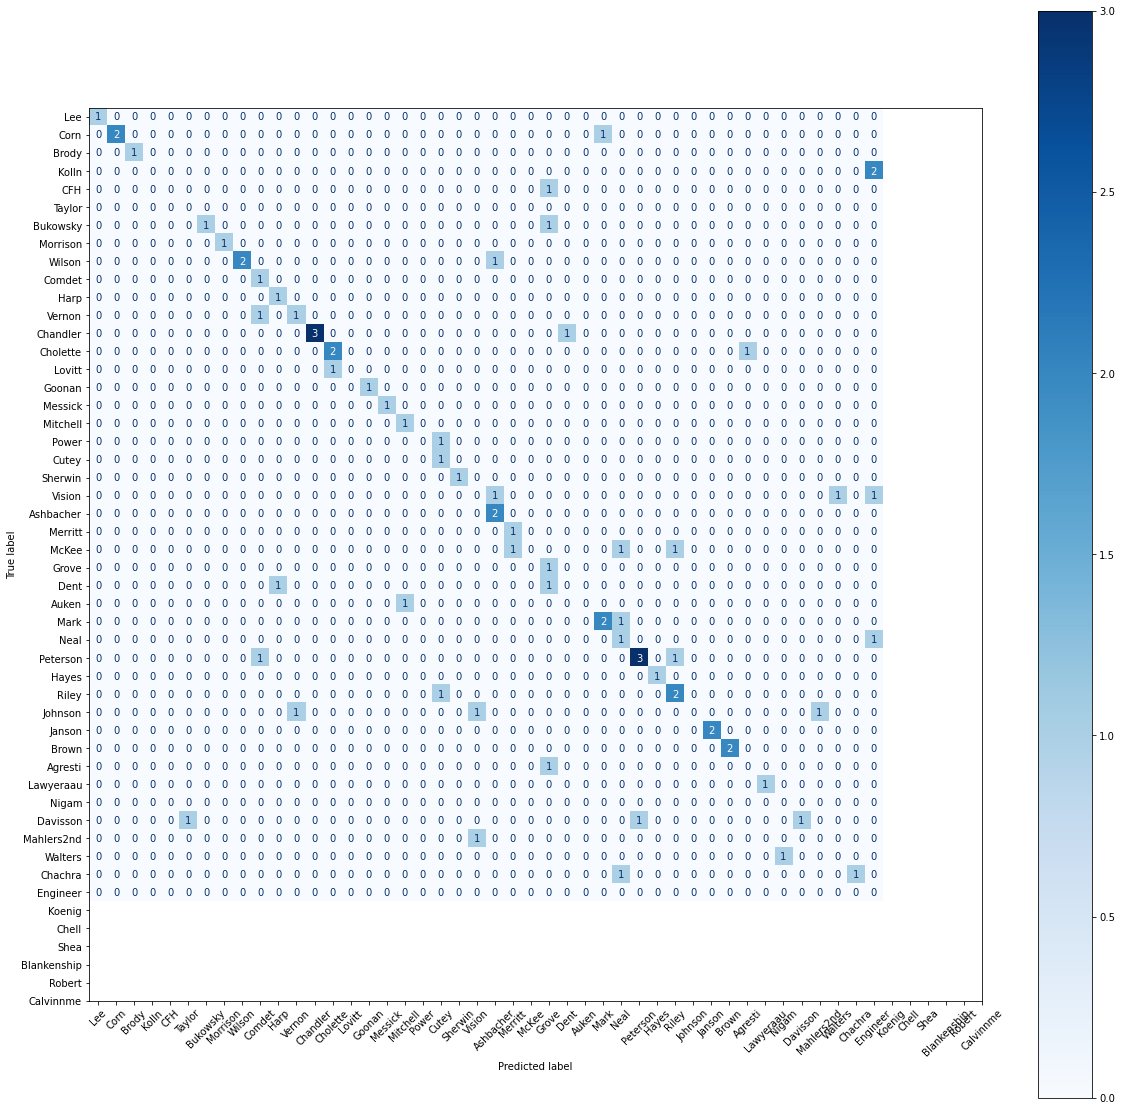

In [63]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(model, validation_set.iloc[:, 100:6000],validation_set["Class"], ax=ax, cmap='Blues')
tick_marks = np.arange(len(dataset_['Class'].unique()))
plt.xticks(tick_marks, dataset_['Class'].unique(), rotation=45)
plt.yticks(tick_marks, dataset_['Class'].unique())
plt.show() 

In [64]:
X= dataset.iloc[:,100:8000]
alpha=0.5
model = create_nb(X, dataset["Class"], alpha)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:8000]), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:8000]), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:8000]), average="macro") * 100)
f1_model=(f1_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:8000]), average="macro") * 100)

print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model, "f1 score", f1_model)

Accuracy is 52.0 precision is: 46.0 Recall is: 50.037037037037045 f1 score 45.730158730158735


In [65]:
X= dataset.iloc[:,200:5500]
alpha=0.05
model = create_nb(X, dataset["Class"], alpha)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:5500]), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:5500]), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:5500]), average="macro") * 100)
f1_model=(f1_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:5500]), average="macro") * 100)


print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model, "f1 score", f1_model)

Accuracy is 56.00000000000001 precision is: 52.234848484848484 Recall is: 56.47727272727272 f1 score 50.37337662337662


In [66]:
X= dataset.iloc[:,200:5000]
alpha=0.05
model = create_nb(X, dataset["Class"], alpha)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:5000]), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:5000]), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:5000]), average="macro") * 100)
f1_model=(f1_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:5000]), average="macro") * 100)
print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model, "f1 score", f1_model)

Accuracy is 57.333333333333336 precision is: 54.35606060606061 Recall is: 57.61363636363635 f1 score 52.10497835497836


In [67]:
X= dataset.iloc[:,200:7500]
alpha=0.5
model = create_nb(X, dataset["Class"], alpha)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:7500]), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:7500]), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:7500]), average="macro") * 100)
f1_model=(f1_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:7500]), average="macro") * 100)
print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model, "f1 score", f1_model)


Accuracy is 53.333333333333336 precision is: 45.77922077922078 Recall is: 51.93181818181819 f1 score 45.63852813852814


In [68]:
X= dataset.iloc[:,100:4000]
alpha=0.5
model = create_nb(X, dataset["Class"], alpha)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:4000]), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:4000]), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:4000]), average="macro") * 100)
f1_model=(f1_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:4000]), average="macro") * 100)

print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model, "f1 score", f1_model)

Accuracy is 56.00000000000001 precision is: 53.372093023255815 Recall is: 58.178294573643406 f1 score 51.926910299003325


In [69]:
X= dataset.iloc[:,250:4500]
alpha=0.5
model = create_nb(X, dataset["Class"], alpha)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_set.iloc[:,250:4500]), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(validation_set.iloc[:,250:4500]), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(validation_set.iloc[:,250:4500]), average="macro") * 100)
f1_model=(f1_score(validation_set["Class"], model.predict(validation_set.iloc[:,250:4500]), average="macro") * 100)

print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model, "f1 score", f1_model)

Accuracy is 57.333333333333336 precision is: 54.844961240310084 Recall is: 58.95348837209302 f1 score 52.823920265780735


In [70]:
X= dataset.iloc[:,150:4000]
alpha=0.5
model = create_nb(X, dataset["Class"], alpha)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_set.iloc[:,150:4000]), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(validation_set.iloc[:,150:4000]), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(validation_set.iloc[:,150:4000]), average="macro") * 100)

print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model)

Accuracy is 58.666666666666664 precision is: 55.370985603543744 Recall is: 59.41860465116279


# Create solution

In [ ]:
amazon_data_solution_raw = pd.read_csv("Datasets/amazon_review_ID.shuf.tes.csv")
amazon_data_solution = amazon_data_solution_raw[headers_sort]
X_predict=np.log(amazon_data_solution.iloc[:, :8000]+1)
accuracy_model=[]
X = np.log(dataset_.iloc[:, :8000]+1)
ccp_alpha = 5e-3
max_leaf = 50
max_depth = 50
n_estimators = 200
model = create_rnd_forrest(X, dataset_["Class"], ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
model.fit(X, dataset_["Class"])
solution= pd.DataFrame([amazon_data_solution_raw["ID"], model.predict(X_predict)])
solution_= model.predict(X_predict)
solution_matrix=pd.DataFrame(solution_, index=amazon_data_solution_raw["ID"], columns=["Class"])
solution_matrix.to_csv("Solution_Random_forest_8000_leaf_50_depth_50_alpha_0005_estimators_200.csv")

In [ ]:
amazon_data_solution_raw = pd.read_csv("Datasets/amazon_review_ID.shuf.tes.csv")
amazon_data_solution = amazon_data_solution_raw[headers_sort]

X_predict=amazon_data_solution.iloc[:, 100:6000]
X = dataset_.iloc[:,100:6000]
alpha=0.5
model = create_nb(X, dataset_["Class"], alpha)
model.fit(X, dataset_["Class"])
solution_= model.predict(X_predict)
solution_matrix=pd.DataFrame(solution_, index=amazon_data_solution_raw["ID"], columns=["Class"])
solution_matrix.to_csv("solution_Naive_Bayes_100_6000.csv")

In [ ]:
accuracy_model=[]
amazon_data_solution_raw = pd.read_csv("Datasets/amazon_review_ID.shuf.tes.csv")
amazon_data_solution = amazon_data_solution_raw[headers_sort]
X_predict=np.log(amazon_data_solution.iloc[:, 50:8000]+1)
X = np.log(dataset_.iloc[:, 50:8000]+1)
model = create_perceptron(X, dataset_["Class"], 0.0002, 1, 'l1', 10, random_state=42)
model.fit(X, dataset_["Class"])
solution_= model.predict(X_predict)
solution_matrix=pd.DataFrame(solution_, index=amazon_data_solution_raw["ID"], columns=["Class"])
solution_matrix.to_csv("Solution_Perceptron_50_8000_max_iter10_penal_l1_alpha_0002_eta_1.csv")



In [ ]:
amazon_data_solution_raw = pd.read_csv("Datasets/amazon_review_ID.shuf.tes.csv")
amazon_data_solution = amazon_data_solution_raw[headers_sort]

X_predict=amazon_data_solution.iloc[:, 100:8000]
X = dataset_.iloc[:,100:8000]
alpha=0.5
model = create_nb(X, dataset_["Class"], alpha)
model.fit(X, dataset_["Class"])
solution_= model.predict(X_predict)
solution_matrix=pd.DataFrame(solution_, index=amazon_data_solution_raw["ID"], columns=["Class"])
solution_matrix.to_csv("solution_Naive_Bayes_100_8000.csv")

In [ ]:
amazon_data_solution_raw = pd.read_csv("Datasets/amazon_review_ID.shuf.tes.csv")
amazon_data_solution = amazon_data_solution_raw[headers_sort]

X_predict=amazon_data_solution.iloc[:, 150:7000]
X = dataset_.iloc[:,150:7000]
alpha=0.5
model = create_nb(X, dataset_["Class"], alpha)
model.fit(X, dataset_["Class"])
solution_= model.predict(X_predict)
solution_matrix=pd.DataFrame(solution_, index=amazon_data_solution_raw["ID"], columns=["Class"])
solution_matrix.to_csv("solution_Naive_Bayes_150_7000.csv")

In [ ]:
amazon_data_solution_raw = pd.read_csv("Datasets/amazon_review_ID.shuf.tes.csv")
amazon_data_solution = amazon_data_solution_raw[headers_sort]

X_predict=amazon_data_solution.iloc[:, 100:4000]
X = dataset_.iloc[:,100:4000]
alpha=0.5
model = create_nb(X, dataset_["Class"], alpha)
model.fit(X, dataset_["Class"])
solution_= model.predict(X_predict)
solution_matrix=pd.DataFrame(solution_, index=amazon_data_solution_raw["ID"], columns=["Class"])
solution_matrix.to_csv("solution_Naive_Bayes_100_4000.csv")

In [ ]:
amazon_data_solution_raw = pd.read_csv("Datasets/amazon_review_ID.shuf.tes.csv")
amazon_data_solution = amazon_data_solution_raw[headers_sort]

X_predict=amazon_data_solution.iloc[:, 250:4500]
X = dataset_.iloc[:,250:4500]
alpha=0.5
model = create_nb(X, dataset_["Class"], alpha)
model.fit(X, dataset_["Class"])
solution_= model.predict(X_predict)
solution_matrix=pd.DataFrame(solution_, index=amazon_data_solution_raw["ID"], columns=["Class"])
solution_matrix.to_csv("solution_Naive_Bayes_250_4500.csv")

In [ ]:
amazon_data_solution_raw = pd.read_csv("Datasets/amazon_review_ID.shuf.tes.csv")
amazon_data_solution = amazon_data_solution_raw[headers_sort]

X_predict=amazon_data_solution.iloc[:, 150:4000]
X = dataset_.iloc[:,150:4000]
alpha=0.5
model = create_nb(X, dataset_["Class"], alpha)
model.fit(X, dataset_["Class"])
solution_= model.predict(X_predict)
solution_matrix=pd.DataFrame(solution_, index=amazon_data_solution_raw["ID"], columns=["Class"])
solution_matrix.to_csv("solution_Naive_Bayes_150_4000.csv")

In [ ]:
amazon_data_solution_raw = pd.read_csv("Datasets/amazon_review_ID.shuf.tes.csv")
amazon_data_solution = amazon_data_solution_raw[headers_sort]

data= np.array(amazon_data_solution)
df_pred = pd.DataFrame(data, columns=range(data.shape[1]))

eps = 1
b = np.zeros((df_pred.shape[0], df_pred.shape[1]))
for i in range(df_pred.shape[0]):
    for j in range(df_pred.shape[1]):
        if df_pred.loc[i,j] < eps:
            b[i,j] = 0
        else:
            b[i,j] = 1
df_bin_pred = pd.DataFrame(b, columns=df_pred.columns, index=df_pred.index)


X_predict=df_bin_pred.iloc[:, 150:4000]
X = dataset__bin.iloc[:,150:4000]
alpha=0.5
model = create_nb(X, dataset_["Class"], alpha)
model.fit(X, dataset_["Class"])
solution_= model.predict(X_predict)
solution_matrix=pd.DataFrame(solution_, index=amazon_data_solution_raw["ID"], columns=["Class"])
solution_matrix.to_csv("solution_Naive_Bayes_bin_150_4000_v2.csv")